<h1>Assignment 3</h1>
<h2>Hate Crimes in New York (2019-2021)</h2>

<H3>Approach</H3>

The data is derived from this website: https://catalog.data.gov/dataset/nypd-hate-crimes.
In a first step, the data gets inspected using different python methods and visualization techniques.
My research is guided by the following research questions:

F1: How is the dataset "NYPD_Hate_Crimes.csv" structured?  
F2: How are the hate crimes structured and how are they distributed over the city?  
F3: Which statistically significant correlations can be observed between the following categorical variables?  
  
    'Offense Category' & 'County'  
    'Complaint Year Number' & 'County'  
    'Patrol Borough Name' &'Law Code Category Description'  
    'Offense Category' & 'Month Number'  
    'Offense Category' & 'Record Create Date'   
    'Law Code Category Description' & 'Bias Motive Description'  
  
  
F1 is answered by the the general inspection of the dataset and the individual variables.  
F2 is answered using pivot and crosstables.  
F3 is answered using researchpy, calculating Cronbachs Alpha.

<h3>Dataset Structure</h3>

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
dfhate = pd.read_csv('NYPD_Hate_Crimes.csv')

In [3]:
dfhate.head(5)

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
0,201900112220917,2019,3,03/07/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
1,201900112125917,2019,1,01/24/2019,1,PATROL BORO MAN SOUTH,NEW YORK,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
2,202100112173517,2021,3,03/06/2021,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-HISPANIC,Ethnicity/National Origin/Ancestry,NaN,NaN,NaN
3,201900112442817,2019,6,06/08/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MUSLIM,Religion/Religious Practice,NaN,06/08/2019,M19626067
4,201900112618217,2019,8,08/14/2019,1,PATROL BORO MAN SOUTH,NEW YORK,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-WHITE,Race/Color,NaN,NaN,NaN


In [4]:
dfhate.tail(5)

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
827,201912212568117,2019,10,10/26/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color,NaN,NaN,NaN
828,201912212498017,2019,9,09/15/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN,NaN
829,201912212334717,2019,6,06/10/2019,122,PATROL BORO STATEN ISLAND,RICHMOND,FELONY,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",ANTI-JEWISH,Religion/Religious Practice,NaN,NaN,NaN
830,202012312240017,2020,8,08/06/2020,123,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF 4TH, GRAFFIT",ANTI-BLACK,Race/Color,NaN,NaN,NaN
831,201912312372817,2019,12,12/28/2019,123,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,CRIMINAL MISCHIEF & RELATED OF,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",ANTI-BLACK,Race/Color,NaN,NaN,NaN


In [6]:
dfhate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              832 non-null    int64  
 1   Complaint Year Number          832 non-null    int64  
 2   Month Number                   832 non-null    int64  
 3   Record Create Date             832 non-null    object 
 4   Complaint Precinct Code        832 non-null    int64  
 5   Patrol Borough Name            832 non-null    object 
 6   County                         832 non-null    object 
 7   Law Code Category Description  832 non-null    object 
 8   Offense Description            832 non-null    object 
 9   PD Code Description            832 non-null    object 
 10  Bias Motive Description        832 non-null    object 
 11  Offense Category               832 non-null    object 
 12  Other Motive Description       0 non-null      flo

In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [49]:
dfhate.isna().sum()

Full Complaint ID                  0
Complaint Year Number              0
Month Number                       0
Record Create Date                 0
Complaint Precinct Code            0
Patrol Borough Name                0
County                             0
Law Code Category Description      0
Offense Description                0
PD Code Description                0
Bias Motive Description            0
Offense Category                   0
Other Motive Description         832
Arrest Date                      566
Arrest Id                        566
dtype: int64

   
<h3>Visualizing Missing Values</h3>

In [28]:
import missingno as msno

<AxesSubplot:>

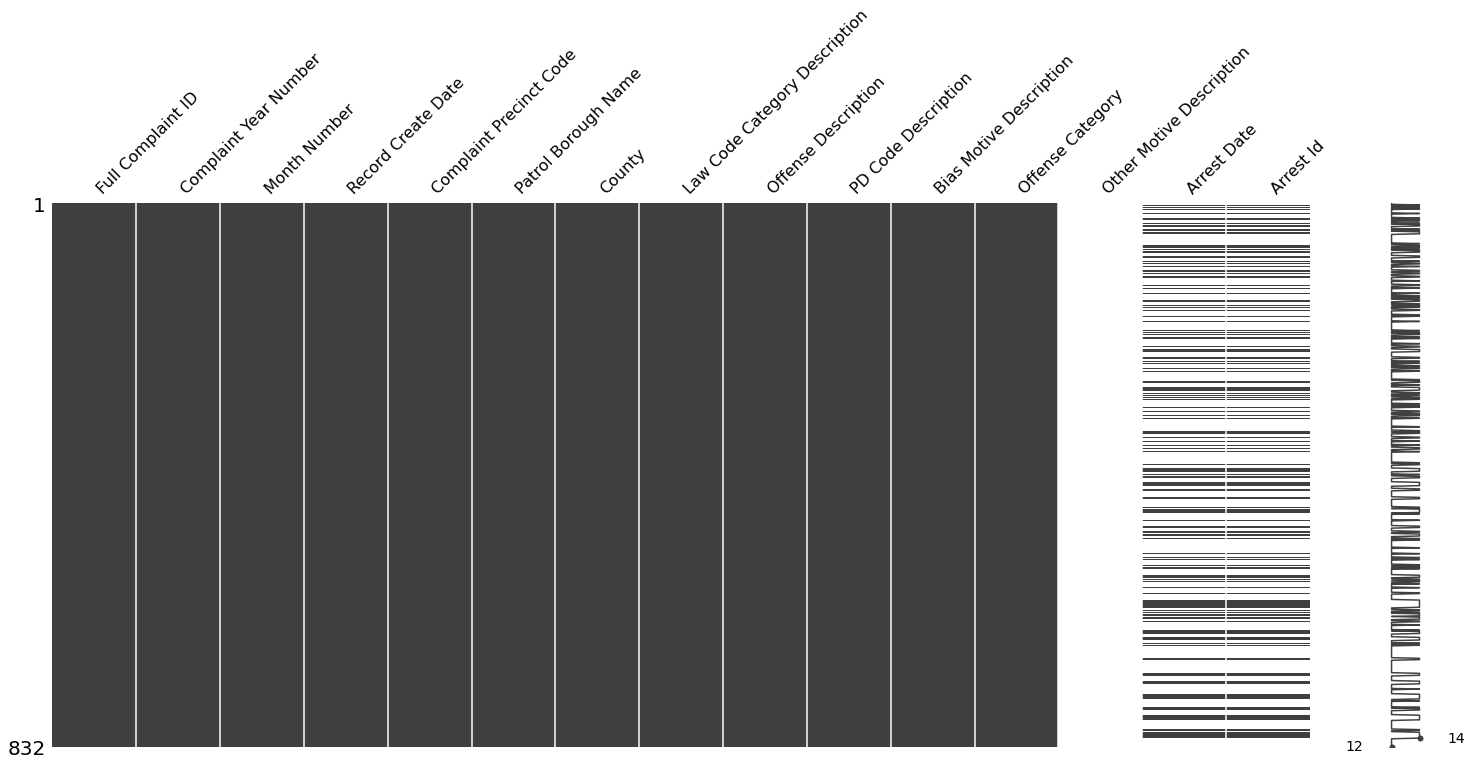

In [29]:
msno.matrix(dfhate)

<AxesSubplot:>

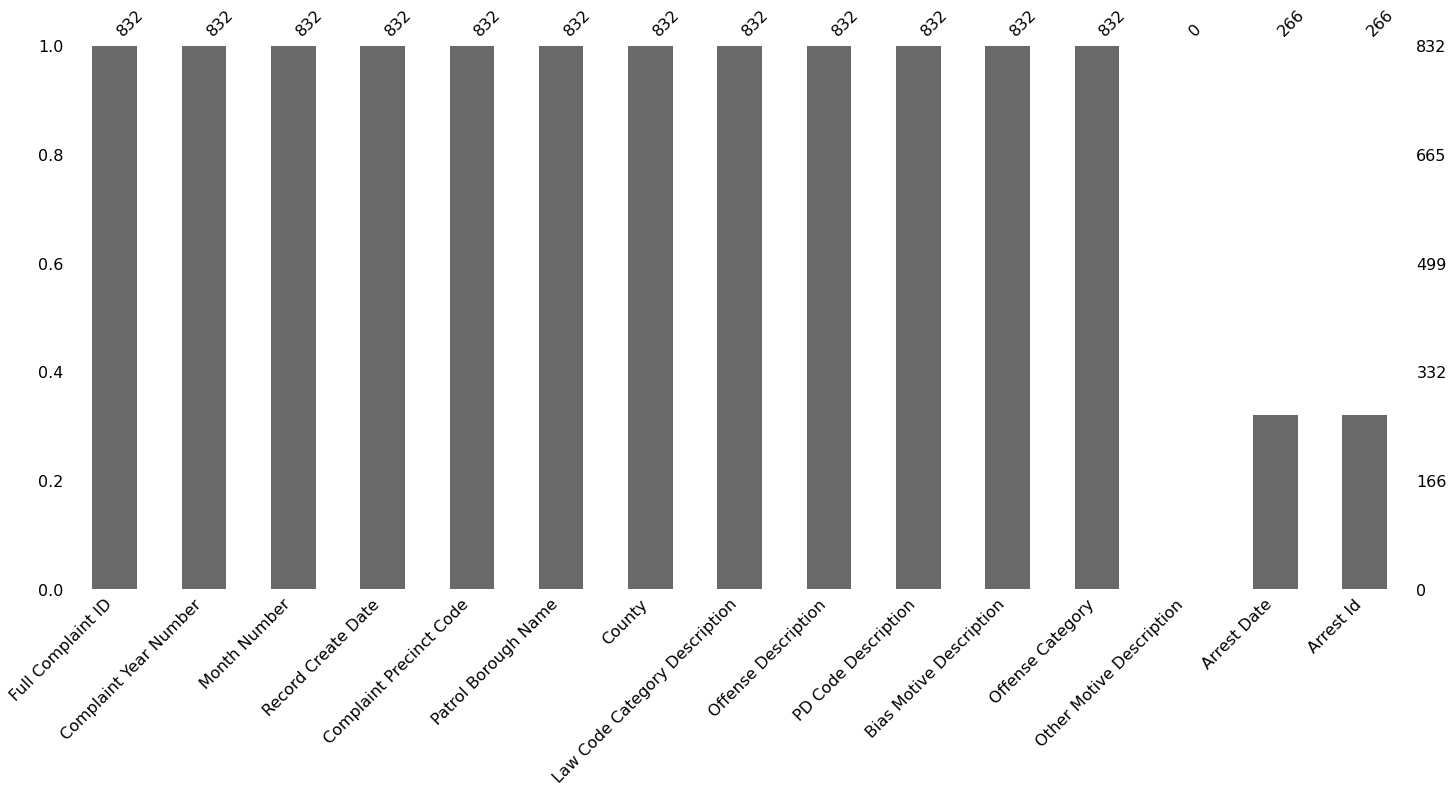

In [31]:
msno.bar(dfhate)

In [ ]:
##After having an overview of the dataset, they individual variables are investigated and visualized individually.

In [26]:
dfhate.[['Complaint Year Number']].describe()

,Complaint Year Number
count,832.000000
mean,2019.584135
std,0.697348
min,2019.000000
25%,2019.000000
50%,2019.000000
75%,2020.000000
max,2021.000000


In [95]:
pd.unique(dfhate['Complaint Year Number'])

array([2019, 2021, 2020], dtype=int64)

In [107]:
dfhate['Complaint Year Number'].value_counts()

2019    447
2020    284
2021    101
Name: Complaint Year Number, dtype: int64

In [59]:
dfhate[['Complaint Year Number']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Complaint Year Number  832 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB


In [60]:
print(dfhate[['Complaint Year Number']])

     Complaint Year Number
0                     2019
1                     2019
2                     2021
3                     2019
4                     2019
..                     ...
827                   2019
828                   2019
829                   2019
830                   2020
831                   2019

[832 rows x 1 columns]


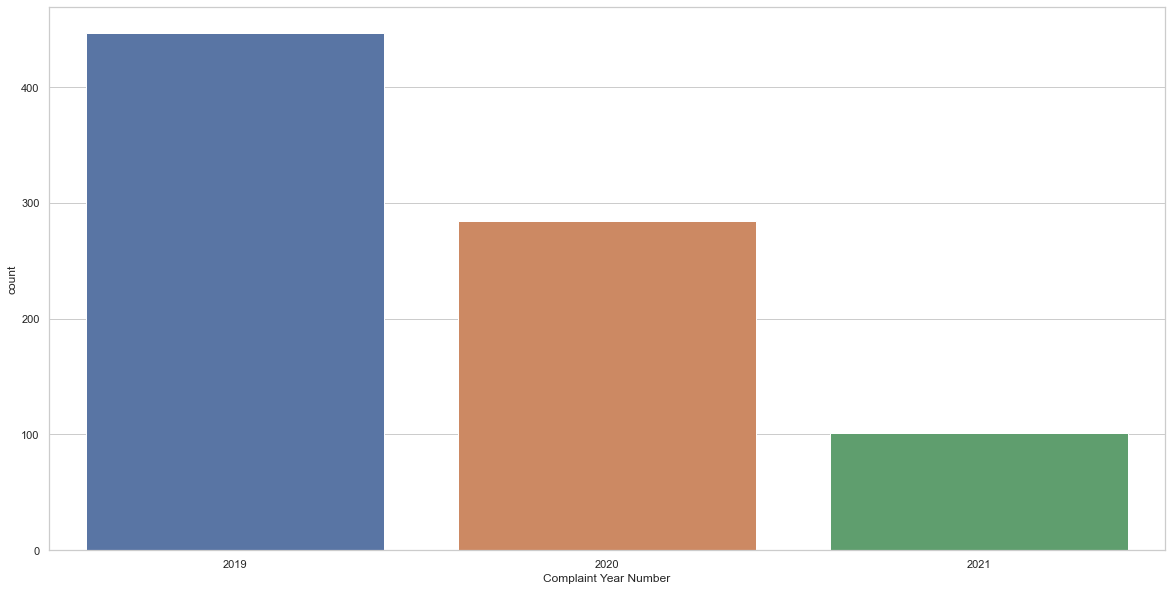

In [7]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Complaint Year Number', data=dfhate)

In [27]:
dfhate[['Month Number']].describe()

,Month Number
count,832.000000
mean,5.974760
std,3.601121
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000


In [96]:
pd.unique(dfhate['Month Number'])

array([ 3,  1,  6,  8,  2, 12, 11,  5,  9,  7,  4, 10], dtype=int64)

In [108]:
dfhate['Month Number'].value_counts()

3     144
2      86
1      85
10     71
12     70
8      65
7      58
6      55
11     53
5      53
9      52
4      40
Name: Month Number, dtype: int64

In [44]:
dfhate[['Month Number']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Month Number  832 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB


In [43]:
print(dfhate[['Month Number']])

     Month Number
0               3
1               1
2               3
3               6
4               8
..            ...
827            10
828             9
829             6
830             8
831            12

[832 rows x 1 columns]


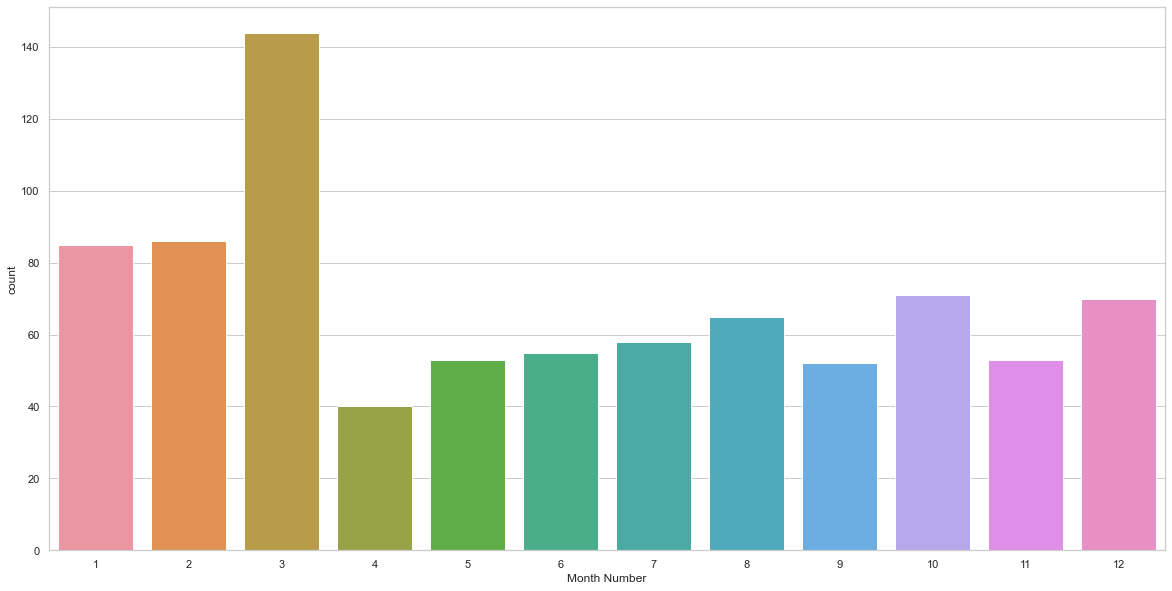

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Month Number', data=dfhate)

<AxesSubplot:ylabel='Month Number'>

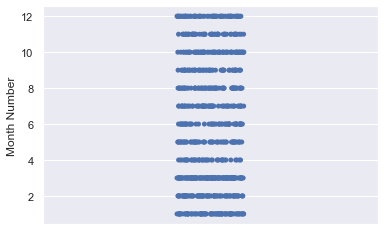

In [137]:
sns.stripplot(y=dfhate['Month Number'])

In [28]:
dfhate[['Record Create Date']].describe()

,Record Create Date
count,832
unique,473
top,08/20/2019
freq,6


In [97]:
pd.unique(dfhate['Record Create Date'])

array(['03/07/2019', '01/24/2019', '03/06/2021', '06/08/2019',
       '08/14/2019', '06/30/2019', '02/24/2020', '02/11/2019',
       '02/12/2020', '03/19/2021', '12/04/2019', '11/14/2019',
       '05/23/2019', '03/12/2020', '02/19/2021', '03/31/2021',
       '01/22/2019', '09/27/2020', '03/24/2019', '02/06/2019',
       '01/03/2019', '07/22/2019', '02/25/2021', '01/13/2020',
       '03/29/2020', '04/18/2019', '03/25/2019', '05/20/2020',
       '10/25/2020', '03/22/2021', '03/17/2021', '07/18/2019',
       '01/14/2020', '03/05/2019', '09/12/2020', '10/05/2020',
       '02/06/2021', '12/18/2020', '06/07/2019', '02/13/2021',
       '08/23/2019', '06/13/2019', '05/24/2020', '08/09/2019',
       '04/21/2020', '08/12/2019', '03/15/2019', '08/25/2019',
       '03/20/2021', '12/07/2019', '03/03/2021', '02/15/2019',
       '03/04/2020', '03/30/2021', '10/22/2019', '01/27/2020',
       '03/26/2021', '05/18/2019', '03/02/2021', '03/21/2021',
       '05/16/2020', '03/25/2020', '10/24/2020', '02/04

In [109]:
dfhate['Record Create Date'].value_counts()

08/20/2019    6
12/27/2019    6
03/05/2019    6
03/12/2021    6
03/08/2019    6
             ..
05/20/2020    1
09/16/2020    1
04/19/2020    1
12/08/2019    1
11/11/2020    1
Name: Record Create Date, Length: 473, dtype: int64

In [45]:
dfhate[['Record Create Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Record Create Date  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [61]:
print(dfhate[['Record Create Date']])

    Record Create Date
0           03/07/2019
1           01/24/2019
2           03/06/2021
3           06/08/2019
4           08/14/2019
..                 ...
827         10/26/2019
828         09/15/2019
829         06/10/2019
830         08/06/2020
831         12/28/2019

[832 rows x 1 columns]


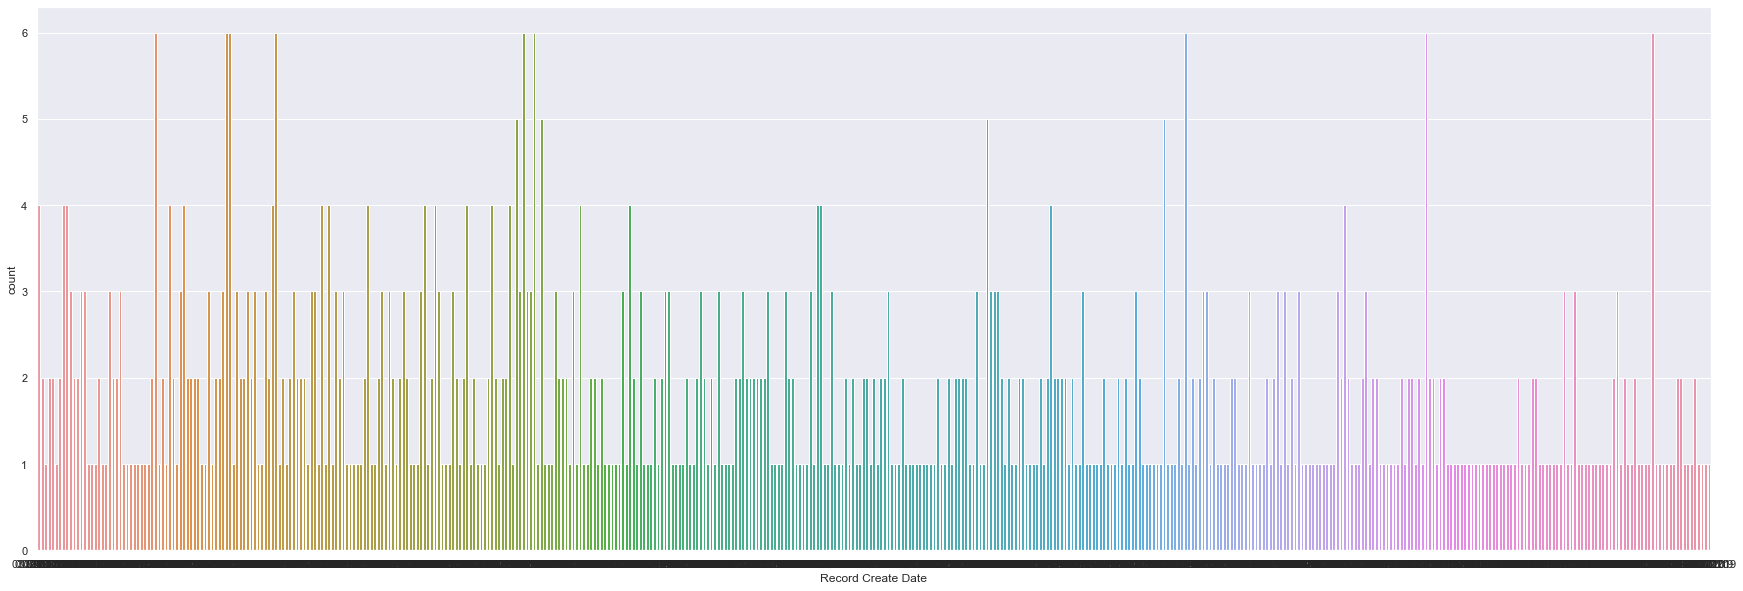

In [122]:
sns.set(style='darkgrid')
plt.figure(figsize=(30,10))

ax = sns.countplot(x='Record Create Date', data=dfhate)

In [29]:
dfhate[['Complaint Precinct Code']].describe()

,Complaint Precinct Code
count,832.000000
mean,61.335337
std,37.071587
min,1.000000
25%,24.000000
50%,67.000000
75%,90.000000
max,123.000000


In [98]:
pd.unique(dfhate['Complaint Precinct Code'])

array([  1,   5,   6,   7,   9,  10,  13,  14,  17,  18,  19,  20,  22,
        23,  24,  25,  26,  28,  30,  32,  33,  34,  40,  41,  42,  43,
        44,  45,  46,  47,  48,  49,  50,  52,  60,  61,  62,  63,  66,
        67,  68,  70,  71,  72,  73,  75,  76,  77,  78,  79,  81,  83,
        84,  88,  90,  94, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 120, 121, 122, 123], dtype=int64)

In [111]:
dfhate['Complaint Precinct Code'].value_counts()

90     35
66     29
71     25
70     23
61     22
       ..
103     2
106     2
113     2
123     2
47      1
Name: Complaint Precinct Code, Length: 76, dtype: int64

In [46]:
dfhate[['Complaint Precinct Code']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Complaint Precinct Code  832 non-null    int64
dtypes: int64(1)
memory usage: 6.6 KB


In [62]:
print(dfhate[['Complaint Precinct Code']])

     Complaint Precinct Code
0                          1
1                          1
2                          1
3                          1
4                          1
..                       ...
827                      122
828                      122
829                      122
830                      123
831                      123

[832 rows x 1 columns]


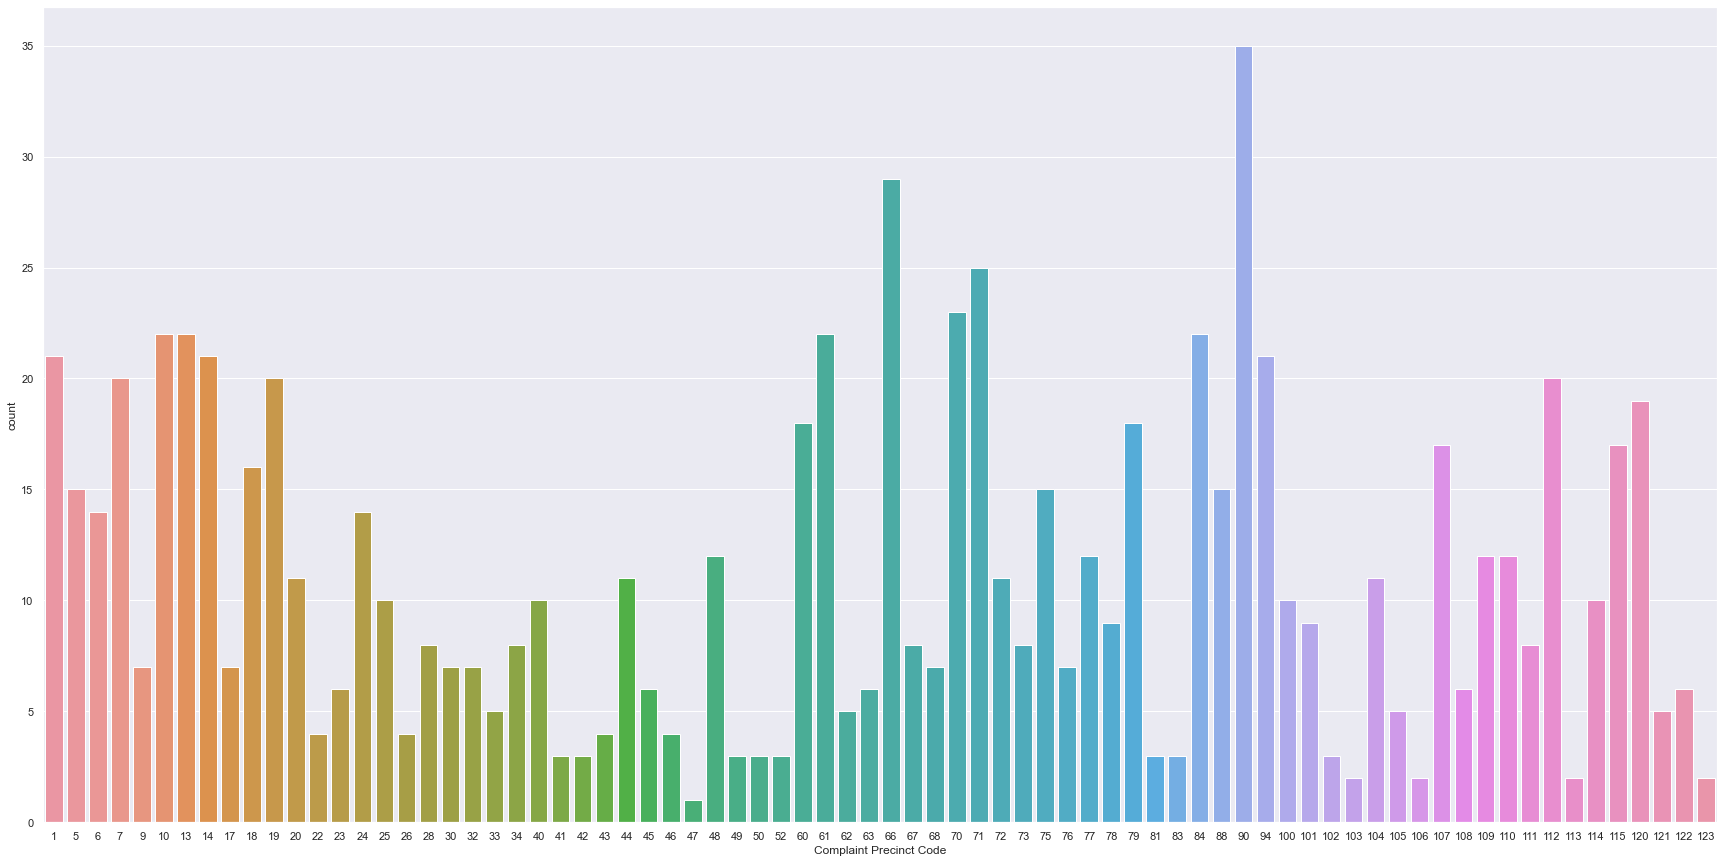

In [120]:
sns.set(style='darkgrid')
plt.figure(figsize=(30,15))

ax = sns.countplot(x='Complaint Precinct Code', data=dfhate)

In [30]:
dfhate[['Patrol Borough Name']].describe()

,Patrol Borough Name
count,832
unique,8
top,PATROL BORO BKLYN SOUTH
freq,170


In [99]:
pd.unique(dfhate['Patrol Borough Name'])

array(['PATROL BORO MAN SOUTH', 'PATROL BORO MAN NORTH',
       'PATROL BORO BRONX', 'PATROL BORO BKLYN SOUTH',
       'PATROL BORO BKLYN NORTH', 'PATROL BORO QUEENS SOUTH',
       'PATROL BORO QUEENS NORTH', 'PATROL BORO STATEN ISLAND'],
      dtype=object)

In [112]:
dfhate['Patrol Borough Name'].value_counts()

PATROL BORO BKLYN SOUTH      170
PATROL BORO MAN SOUTH        165
PATROL BORO BKLYN NORTH      152
PATROL BORO MAN NORTH        104
PATROL BORO QUEENS NORTH      96
PATROL BORO BRONX             63
PATROL BORO QUEENS SOUTH      50
PATROL BORO STATEN ISLAND     32
Name: Patrol Borough Name, dtype: int64

In [47]:
dfhate[['Patrol Borough Name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patrol Borough Name  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [63]:
print(dfhate[['Patrol Borough Name']])

           Patrol Borough Name
0        PATROL BORO MAN SOUTH
1        PATROL BORO MAN SOUTH
2        PATROL BORO MAN SOUTH
3        PATROL BORO MAN SOUTH
4        PATROL BORO MAN SOUTH
..                         ...
827  PATROL BORO STATEN ISLAND
828  PATROL BORO STATEN ISLAND
829  PATROL BORO STATEN ISLAND
830  PATROL BORO STATEN ISLAND
831  PATROL BORO STATEN ISLAND

[832 rows x 1 columns]


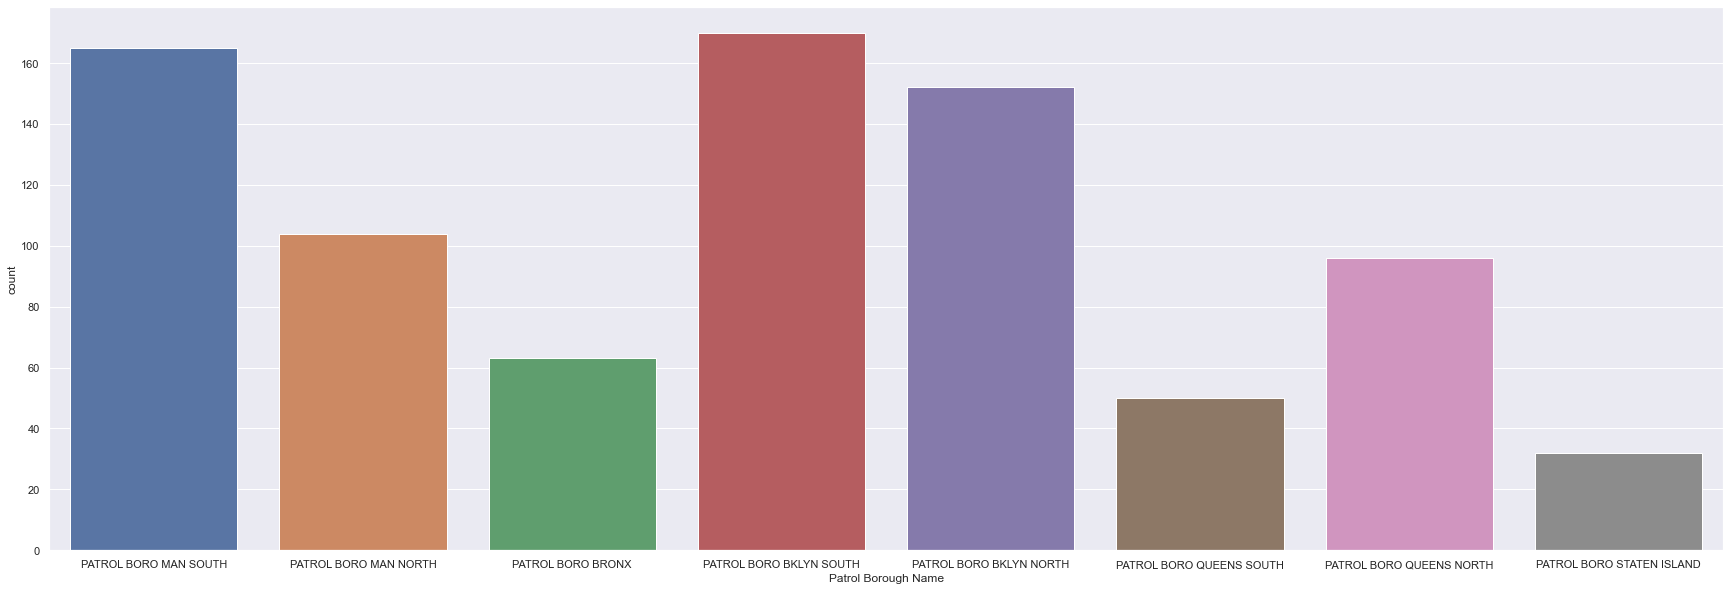

In [119]:
sns.set(style='darkgrid')
plt.figure(figsize=(30,10))

ax = sns.countplot(x='Patrol Borough Name', data=dfhate)

<AxesSubplot:ylabel='Patrol Borough Name'>

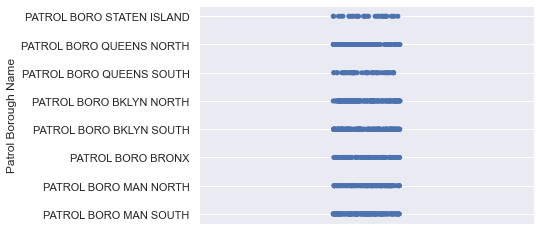

In [140]:
sns.stripplot(y=dfhate['Patrol Borough Name'])

In [48]:
dfhate[['County']].describe()

,County
count,832
unique,5
top,KINGS
freq,322


In [100]:
pd.unique(dfhate['County'])

array(['NEW YORK', 'BRONX', 'KINGS', 'QUEENS', 'RICHMOND'], dtype=object)

In [113]:
dfhate['County'].value_counts()

KINGS       322
NEW YORK    269
QUEENS      146
BRONX        63
RICHMOND     32
Name: County, dtype: int64

In [49]:
dfhate[['County']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [64]:
print(dfhate[['County']])

       County
0    NEW YORK
1    NEW YORK
2    NEW YORK
3    NEW YORK
4    NEW YORK
..        ...
827  RICHMOND
828  RICHMOND
829  RICHMOND
830  RICHMOND
831  RICHMOND

[832 rows x 1 columns]


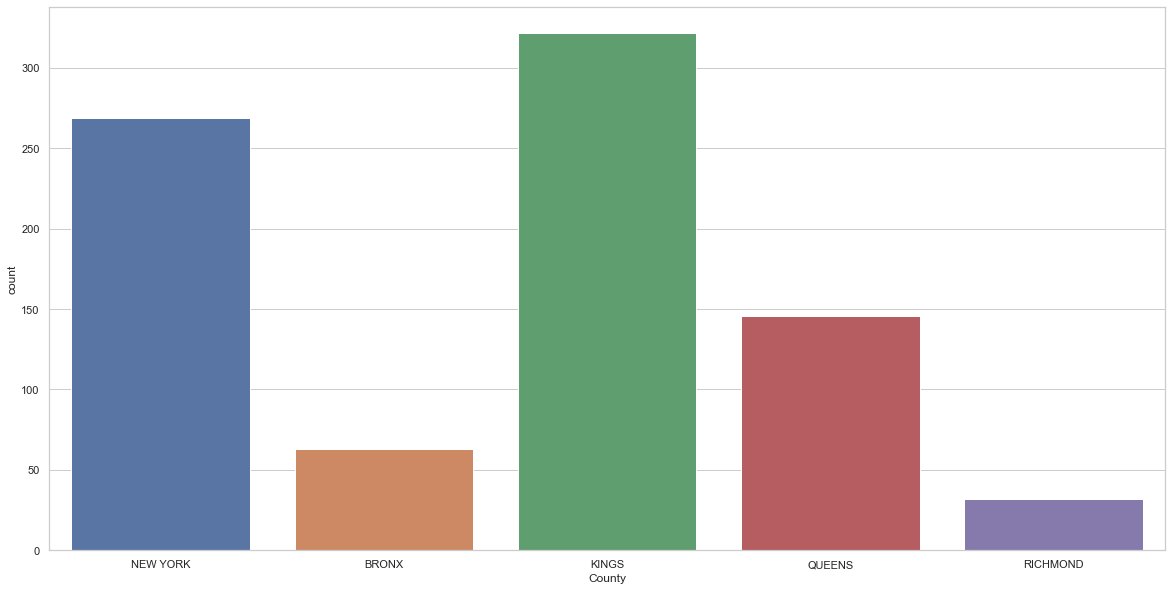

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='County', data=dfhate)

<AxesSubplot:ylabel='County'>

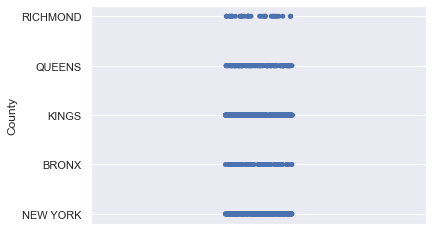

In [141]:
sns.stripplot(y=dfhate['County'])

In [50]:
dfhate[['Law Code Category Description']].describe()

,Law Code Category Description
count,832
unique,4
top,MISDEMEANOR
freq,413


In [101]:
pd.unique(dfhate['Law Code Category Description'])

array(['FELONY', 'MISDEMEANOR', 'VIOLATION', 'INVESTIGATION'],
      dtype=object)

In [114]:
dfhate['Law Code Category Description'].value_counts()

MISDEMEANOR      413
FELONY           406
VIOLATION         12
INVESTIGATION      1
Name: Law Code Category Description, dtype: int64

In [51]:
dfhate[['Law Code Category Description']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Law Code Category Description  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [66]:
print(dfhate[['Law Code Category Description']])

    Law Code Category Description
0                          FELONY
1                     MISDEMEANOR
2                          FELONY
3                          FELONY
4                          FELONY
..                            ...
827                   MISDEMEANOR
828                   MISDEMEANOR
829                        FELONY
830                   MISDEMEANOR
831                   MISDEMEANOR

[832 rows x 1 columns]


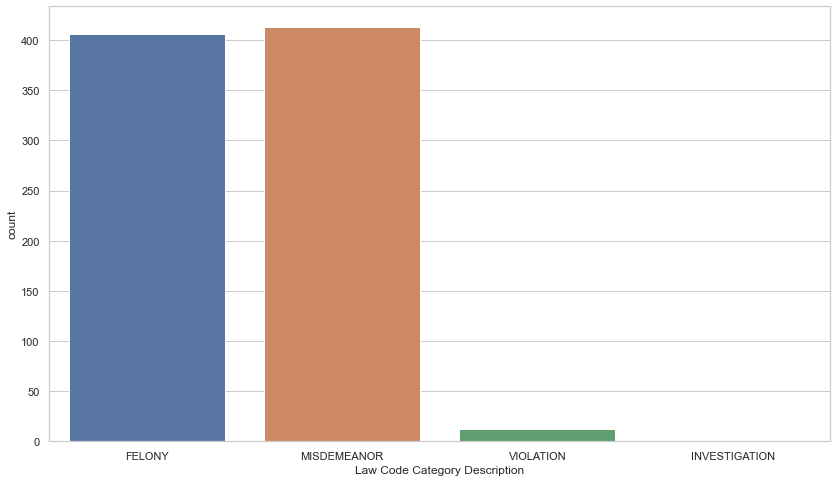

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(14,8))

ax = sns.countplot(x='Law Code Category Description', data=dfhate)

<AxesSubplot:ylabel='Law Code Category Description'>

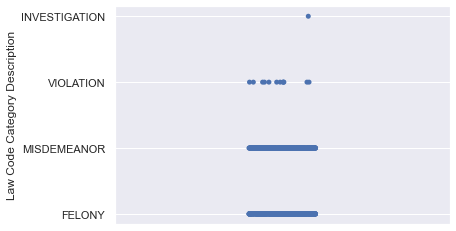

In [142]:
sns.stripplot(y=dfhate['Law Code Category Description'])

In [33]:
dfhate[['Offense Description']].describe()

,Offense Description
count,832
unique,16
top,CRIMINAL MISCHIEF & RELATED OF
freq,247


In [102]:
pd.unique(dfhate['Offense Description'])

array(['MISCELLANEOUS PENAL LAW', 'CRIMINAL MISCHIEF & RELATED OF',
       'FELONY ASSAULT', 'OFF. AGNST PUB ORD SENSBLTY &',
       'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY', 'SEX CRIMES',
       'PETIT LARCENY', 'HARRASSMENT 2', 'GRAND LARCENY', 'RAPE',
       'INVESTIGATIONS/COMPLAINTS ONLY', 'BURGLARY',
       'MURDER & NON-NEGL. MANSLAUGHTE', 'DANGEROUS WEAPONS', 'FRAUDS'],
      dtype=object)

In [115]:
dfhate['Offense Description'].value_counts()

CRIMINAL MISCHIEF & RELATED OF    247
MISCELLANEOUS PENAL LAW           230
ASSAULT 3 & RELATED OFFENSES      120
OFF. AGNST PUB ORD SENSBLTY &      88
FELONY ASSAULT                     82
ROBBERY                            24
GRAND LARCENY                      14
HARRASSMENT 2                      12
BURGLARY                            5
SEX CRIMES                          2
MURDER & NON-NEGL. MANSLAUGHTE      2
PETIT LARCENY                       2
FRAUDS                              1
DANGEROUS WEAPONS                   1
INVESTIGATIONS/COMPLAINTS ONLY      1
RAPE                                1
Name: Offense Description, dtype: int64

In [54]:
dfhate[['Offense Description']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Offense Description  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [67]:
print(dfhate[['Offense Description']])

                Offense Description
0           MISCELLANEOUS PENAL LAW
1    CRIMINAL MISCHIEF & RELATED OF
2                    FELONY ASSAULT
3                    FELONY ASSAULT
4                    FELONY ASSAULT
..                              ...
827  CRIMINAL MISCHIEF & RELATED OF
828    ASSAULT 3 & RELATED OFFENSES
829  CRIMINAL MISCHIEF & RELATED OF
830  CRIMINAL MISCHIEF & RELATED OF
831  CRIMINAL MISCHIEF & RELATED OF

[832 rows x 1 columns]


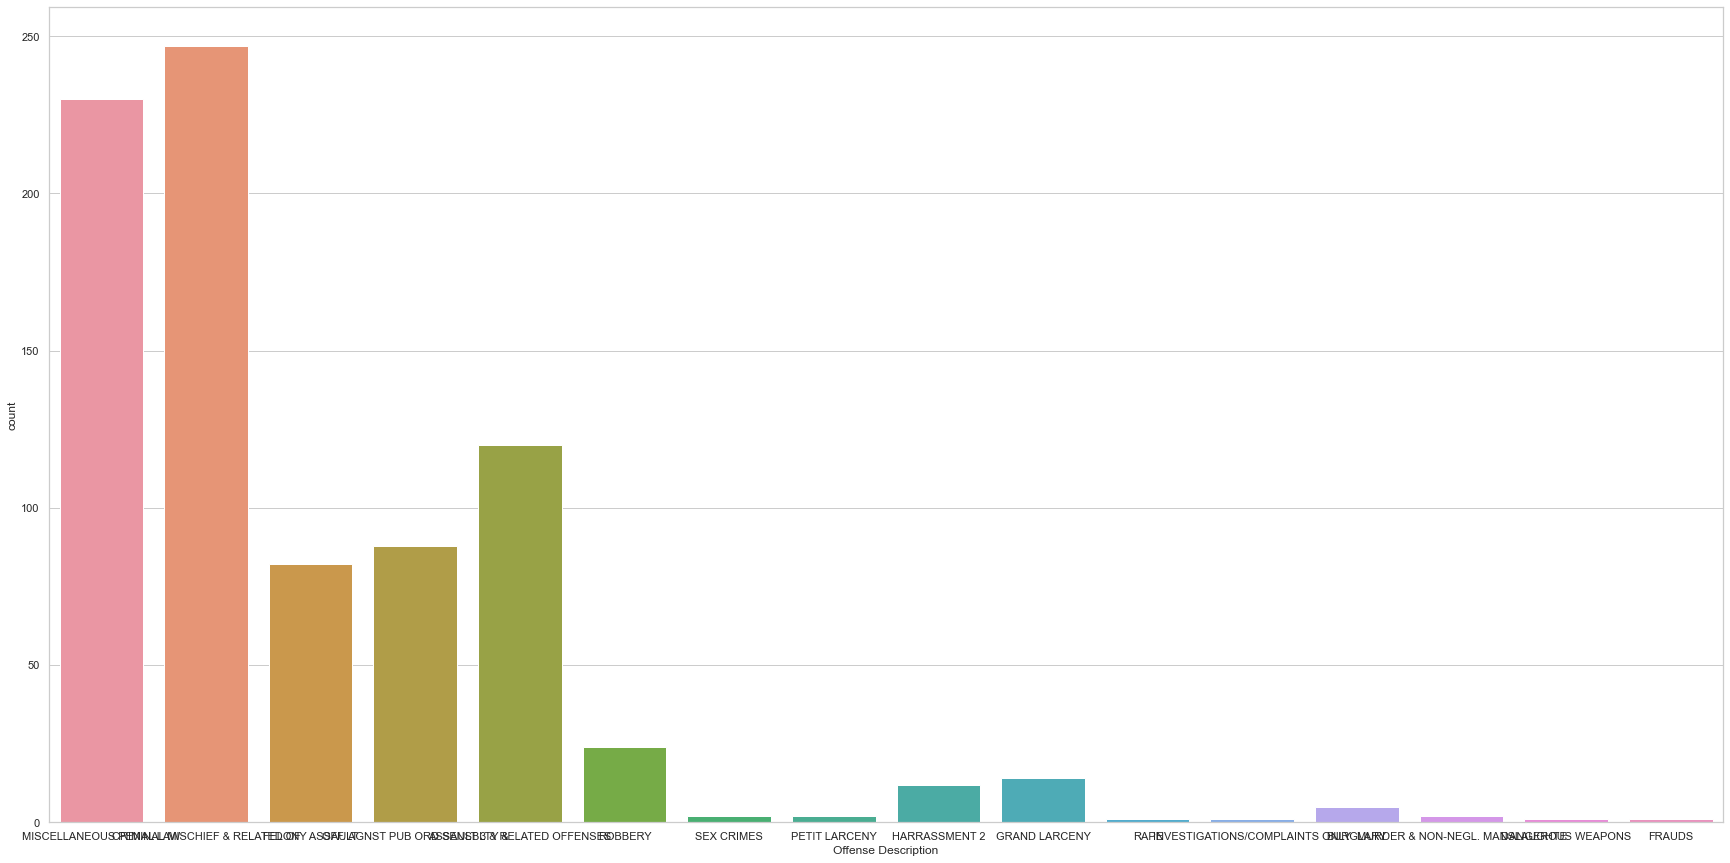

In [17]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,15))

ax = sns.countplot(x='Offense Description', data=dfhate)

<AxesSubplot:ylabel='Offense Description'>

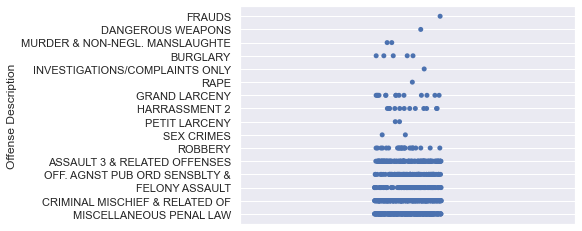

In [143]:
sns.stripplot(y=dfhate['Offense Description'])

In [34]:
dfhate[['PD Code Description']].describe()

,PD Code Description
count,832
unique,43
top,AGGRAVATED HARASSMENT 1
freq,224


In [103]:
pd.unique(dfhate['PD Code Description'])

array(['AGGRAVATED HARASSMENT 1', 'CRIMINAL MISCHIEF 4TH, GRAFFIT',
       'ASSAULT 2,1,UNCLASSIFIED', 'AGGRAVATED HARASSMENT 2', 'ASSAULT 3',
       'MENACING,UNCLASSIFIED', 'CRIMINAL MIS 2 & 3',
       'ROBBERY,PUBLIC PLACE INSIDE', 'ROBBERY,NECKCHAIN/JEWELRY',
       'SEXUAL ABUSE 3,2', 'MENACING 1ST DEGREE (VICT NOT',
       'MISCHIEF,CRIMINAL,    UNCL 2ND', 'SEXUAL ABUSE',
       'ROBBERY,DWELLING', 'CRIMINAL MISCHIEF,UNCLASSIFIED 4',
       'LARCENY,PETIT FROM BUILDING,UN', 'MISCHIEF, CRIMINAL 3 & 2, OF M',
       'MAKING TERRORISTIC THREAT', 'RECKLESS ENDANGERMENT 1',
       'HARASSMENT,SUBD 1,CIVILIAN', 'ROBBERY,PERSONAL ELECTRONIC DEVICE',
       'ROBBERY,POCKETBOOK/CARRIED BAG', 'LARCENY,GRAND BY EXTORTION',
       'MISCHIEF, CRIMINAL 4, OF MOTOR', 'ROBBERY,OPEN AREA UNCLASSIFIED',
       'MISCHIEF, CRIMINAL 4, BY FIRE',
       'LARCENY,PETIT FROM BUILDING,UNATTENDED, PACKAGE THEFT INSIDE',
       'RAPE 1', 'INVESTIGATE CHILD ABUSE', 'BURGLARY,UNCLASSIFIED,NIGHT',
       'MUR

In [116]:
dfhate['PD Code Description'].value_counts()

AGGRAVATED HARASSMENT 1                                         224
CRIMINAL MISCHIEF 4TH, GRAFFIT                                  165
ASSAULT 3                                                       102
AGGRAVATED HARASSMENT 2                                          88
ASSAULT 2,1,UNCLASSIFIED                                         82
CRIMINAL MISCHIEF,UNCLASSIFIED 4                                 26
CRIMINAL MIS 2 & 3                                               20
MISCHIEF,CRIMINAL,    UNCL 2ND                                   19
MENACING,UNCLASSIFIED                                            17
LARCENY,GRAND FROM PERSON,UNCL                                    9
HARASSMENT,SUBD 3,4,5                                             9
ROBBERY,OPEN AREA UNCLASSIFIED                                    8
MISCHIEF, CRIMINAL 3 & 2, OF M                                    6
MISCHIEF, CRIMINAL 4, OF MOTOR                                    6
ROBBERY,PERSONAL ELECTRONIC DEVICE              

In [55]:
dfhate[['PD Code Description']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PD Code Description  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [68]:
print(dfhate[['PD Code Description']])

                  PD Code Description
0             AGGRAVATED HARASSMENT 1
1      CRIMINAL MISCHIEF 4TH, GRAFFIT
2            ASSAULT 2,1,UNCLASSIFIED
3            ASSAULT 2,1,UNCLASSIFIED
4            ASSAULT 2,1,UNCLASSIFIED
..                                ...
827    CRIMINAL MISCHIEF 4TH, GRAFFIT
828                         ASSAULT 3
829    MISCHIEF,CRIMINAL,    UNCL 2ND
830    CRIMINAL MISCHIEF 4TH, GRAFFIT
831  CRIMINAL MISCHIEF,UNCLASSIFIED 4

[832 rows x 1 columns]


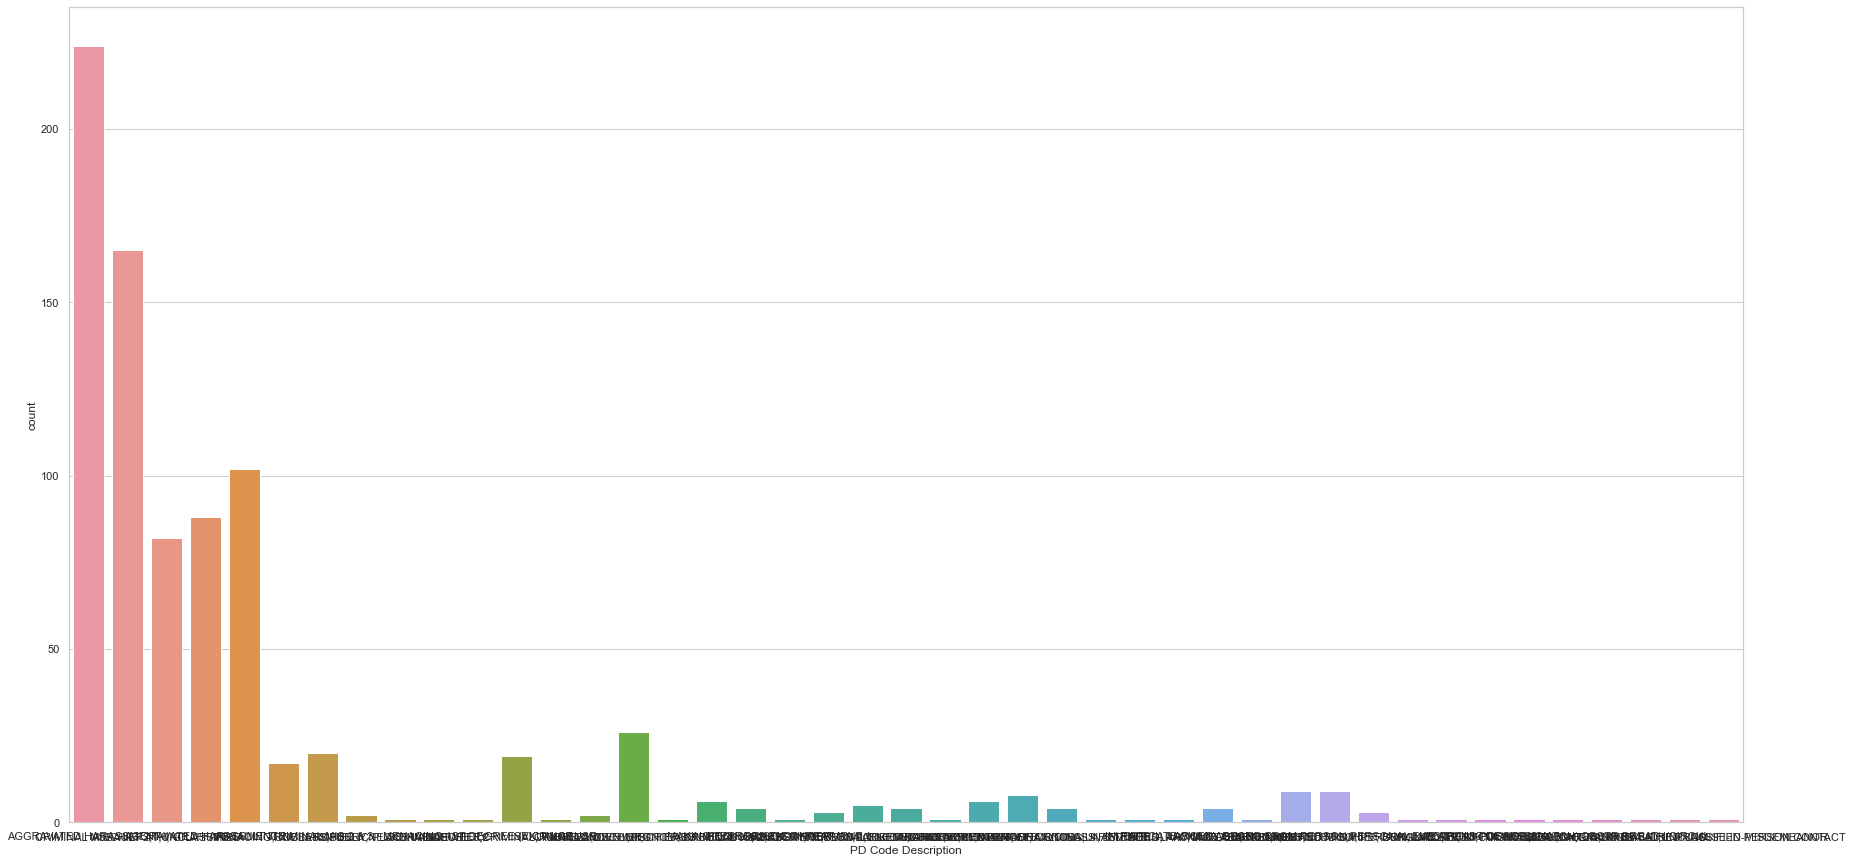

In [18]:
sns.set(style='whitegrid')
plt.figure(figsize=(30,15))

ax = sns.countplot(x='PD Code Description', data=dfhate)

In [35]:
dfhate[['Bias Motive Description']].describe()

,Bias Motive Description
count,832
unique,23
top,ANTI-JEWISH
freq,406


In [104]:
pd.unique(dfhate['Bias Motive Description'])

array(['ANTI-JEWISH', 'ANTI-HISPANIC', 'ANTI-MUSLIM', 'ANTI-WHITE',
       'ANTI-FEMALE HOMOSEXUAL (LESBIAN)', 'ANTI-ASIAN', 'ANTI-BLACK',
       'ANTI-MALE HOMOSEXUAL (GAY)', 'ANTI-OTHER ETHNICITY',
       'ANTI-TRANSGENDER', 'ANTI-MULTI-RACIAL GROUPS',
       'ANTI-JEHOVAHS WITNESS', 'ANTI-BUDDHIST', 'ANTI-CATHOLIC',
       'ANTI-LGBT (MIXED GROUP)', 'ANTI-ARAB', 'ANTI-PHYSICAL DISABILITY',
       'ANTI-GENDER NON-CONFORMING', 'ANTI-RELIGIOUS PRACTICE GENERALLY',
       'ANTI-OTHER RELIGION', 'ANTI-FEMALE', 'ANTI-HINDU',
       '60 YRS AND OLDER'], dtype=object)

In [117]:
dfhate['Bias Motive Description'].value_counts()

ANTI-JEWISH                          406
ANTI-BLACK                            85
ANTI-MALE HOMOSEXUAL (GAY)            84
ANTI-ASIAN                            81
ANTI-WHITE                            38
ANTI-MUSLIM                           21
ANTI-TRANSGENDER                      19
ANTI-CATHOLIC                         15
ANTI-FEMALE                           14
ANTI-OTHER ETHNICITY                  13
ANTI-FEMALE HOMOSEXUAL (LESBIAN)      12
ANTI-LGBT (MIXED GROUP)               11
ANTI-HISPANIC                         11
ANTI-ARAB                              6
ANTI-MULTI-RACIAL GROUPS               3
ANTI-HINDU                             2
ANTI-BUDDHIST                          2
ANTI-OTHER RELIGION                    2
ANTI-GENDER NON-CONFORMING             2
ANTI-RELIGIOUS PRACTICE GENERALLY      2
60 YRS AND OLDER                       1
ANTI-PHYSICAL DISABILITY               1
ANTI-JEHOVAHS WITNESS                  1
Name: Bias Motive Description, dtype: int64

In [56]:
dfhate[['Bias Motive Description']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bias Motive Description  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [69]:
print(dfhate[['Bias Motive Description']])

        Bias Motive Description
0                   ANTI-JEWISH
1                   ANTI-JEWISH
2                 ANTI-HISPANIC
3                   ANTI-MUSLIM
4                    ANTI-WHITE
..                          ...
827                  ANTI-BLACK
828  ANTI-MALE HOMOSEXUAL (GAY)
829                 ANTI-JEWISH
830                  ANTI-BLACK
831                  ANTI-BLACK

[832 rows x 1 columns]


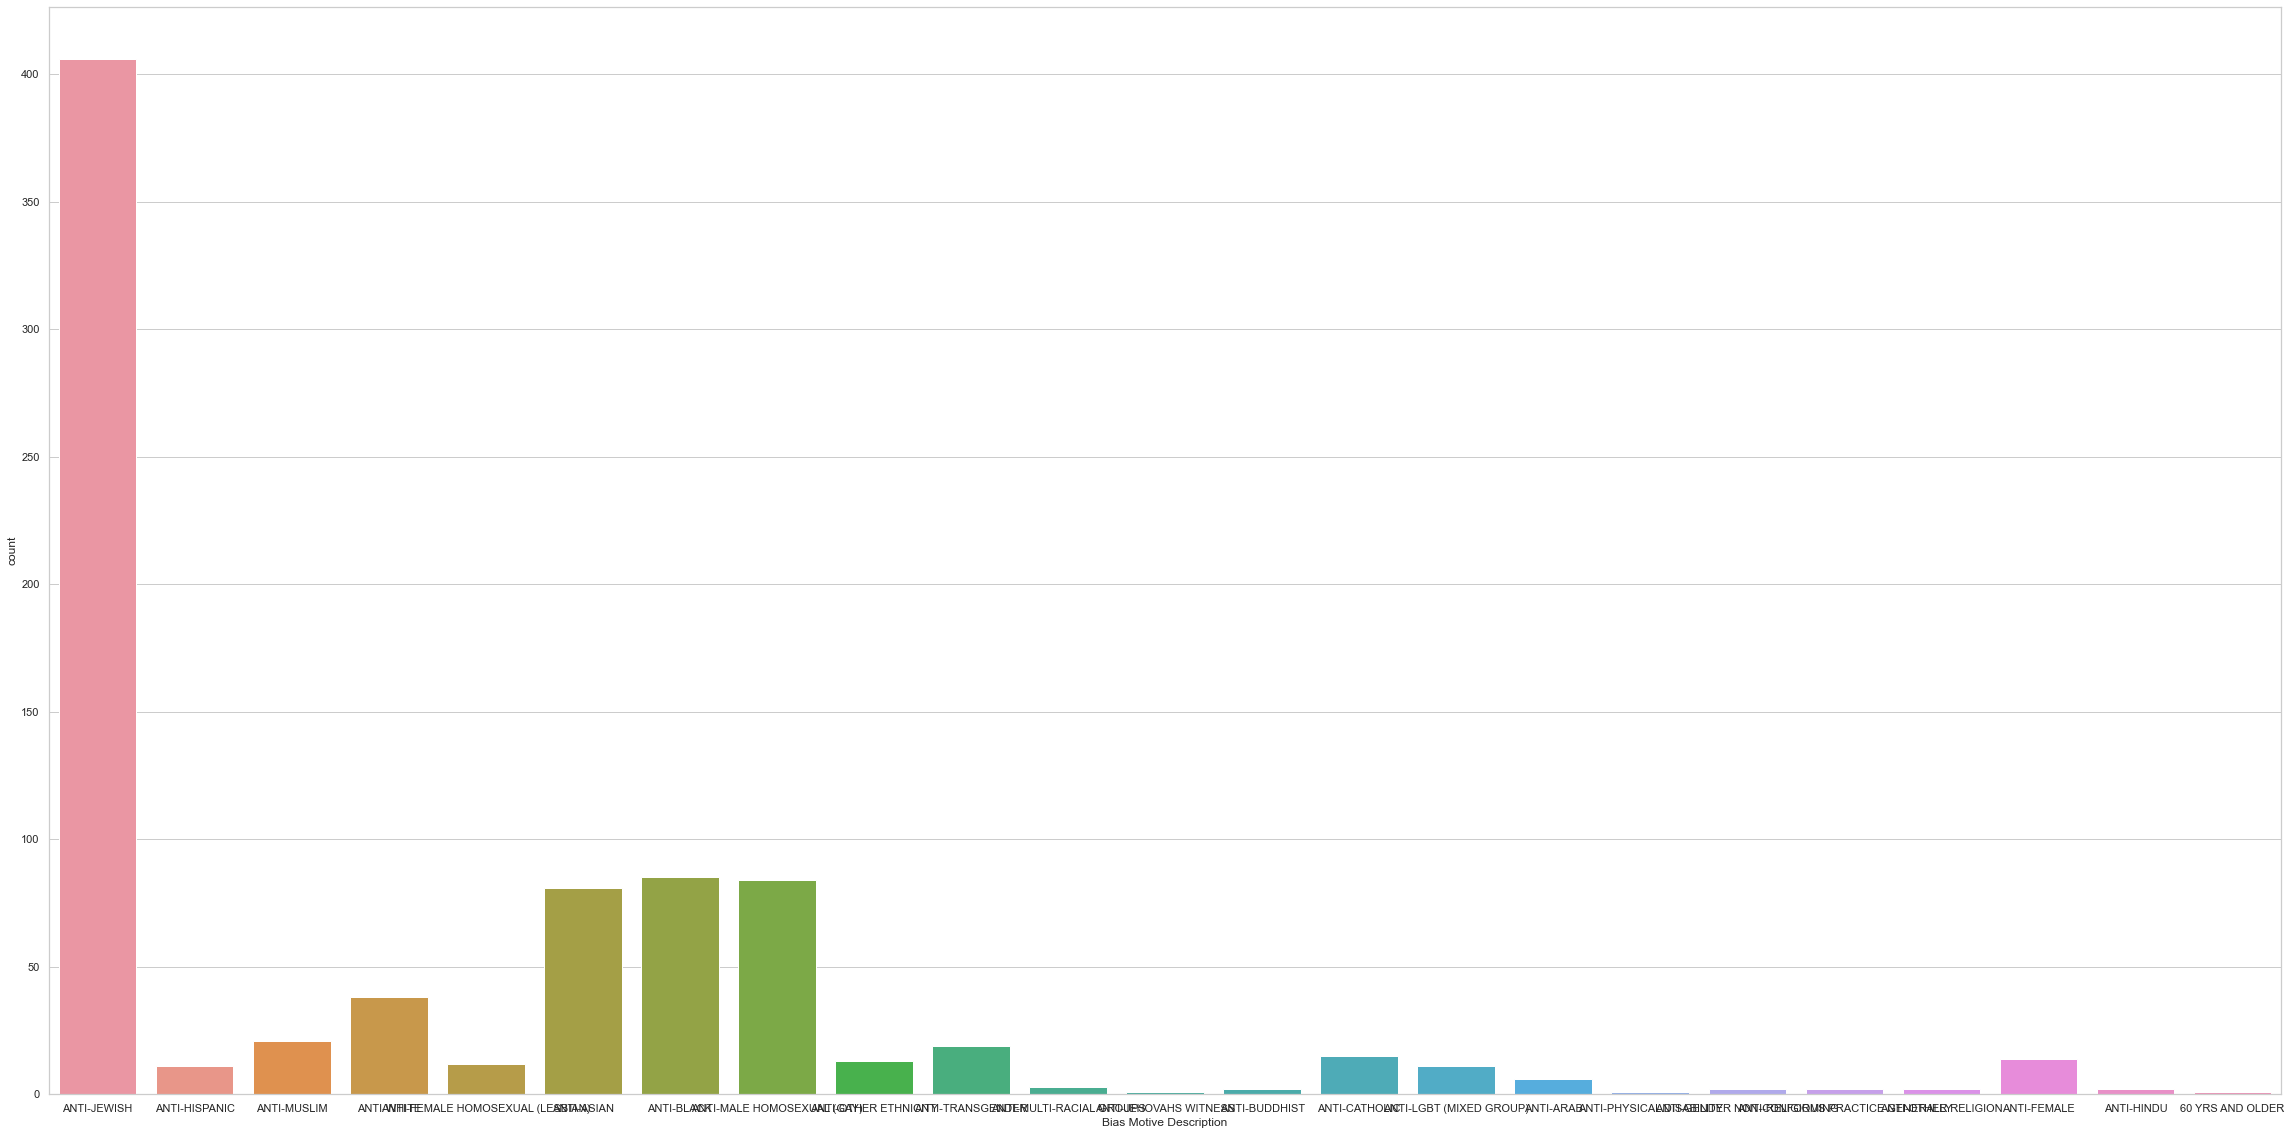

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(40,20))

ax = sns.countplot(x='Bias Motive Description', data=dfhate)

<AxesSubplot:ylabel='Bias Motive Description'>

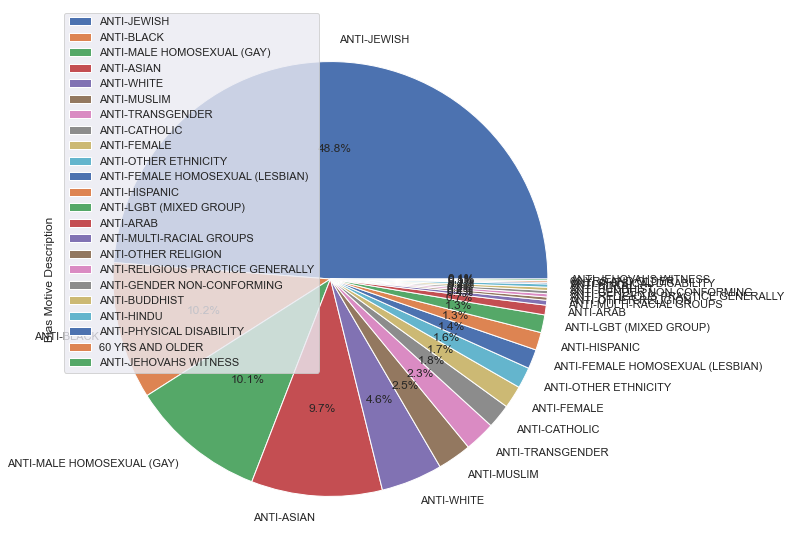

In [126]:
type_counts = dfhate['Bias Motive Description'].value_counts()

df2 = pd.DataFrame({'Bias Motive Description': type_counts})

df2.plot.pie(y='Bias Motive Description', figsize=(15,10), autopct='%1.1f%%')

<Figure size 1008x576 with 0 Axes>

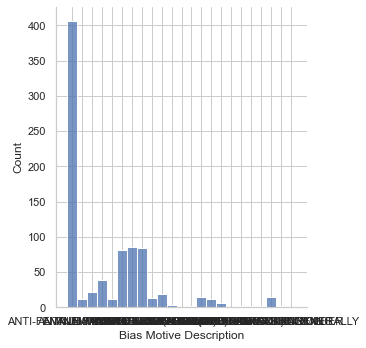

In [21]:
filter_data = dfhate.dropna(subset=['Bias Motive Description'])
plt.figure(figsize=(14,8))

sns.displot(filter_data['Bias Motive Description'], kde=False)

<AxesSubplot:ylabel='Bias Motive Description'>

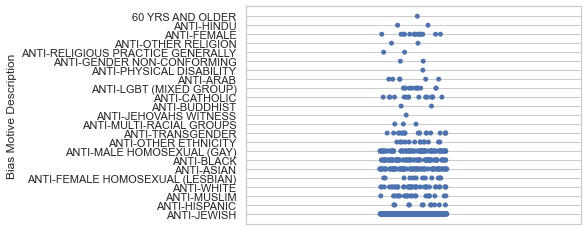

In [118]:
sns.stripplot(y=dfhate['Bias Motive Description'])


In [36]:
dfhate[['Offense Category']].describe()

,Offense Category
count,832
unique,7
top,Religion/Religious Practice
freq,451


In [105]:
pd.unique(dfhate['Offense Category'])

array(['Religion/Religious Practice',
       'Ethnicity/National Origin/Ancestry', 'Race/Color',
       'Sexual Orientation', 'Gender', 'Disability', 'Age'], dtype=object)

In [118]:
dfhate['Offense Category'].value_counts()

Religion/Religious Practice           451
Race/Color                            207
Sexual Orientation                    107
Gender                                 35
Ethnicity/National Origin/Ancestry     30
Age                                     1
Disability                              1
Name: Offense Category, dtype: int64

In [57]:
dfhate[['Offense Category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Offense Category  832 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [70]:
print(dfhate[['Offense Category']])

                       Offense Category
0           Religion/Religious Practice
1           Religion/Religious Practice
2    Ethnicity/National Origin/Ancestry
3           Religion/Religious Practice
4                            Race/Color
..                                  ...
827                          Race/Color
828                  Sexual Orientation
829         Religion/Religious Practice
830                          Race/Color
831                          Race/Color

[832 rows x 1 columns]


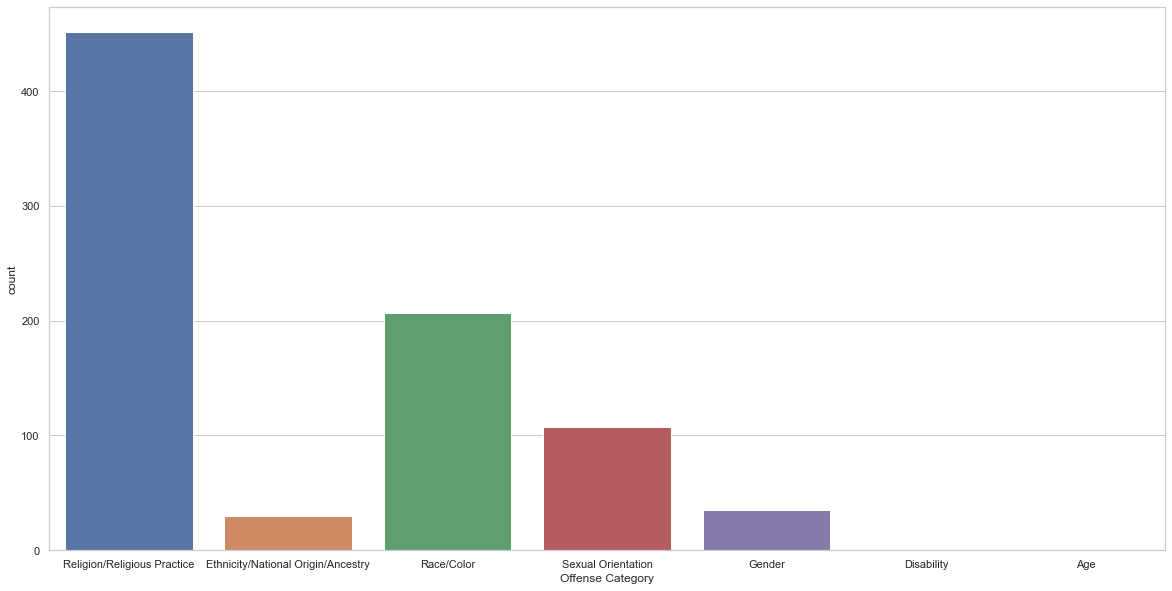

In [22]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Offense Category', data=dfhate)

<AxesSubplot:ylabel='Offense Category'>

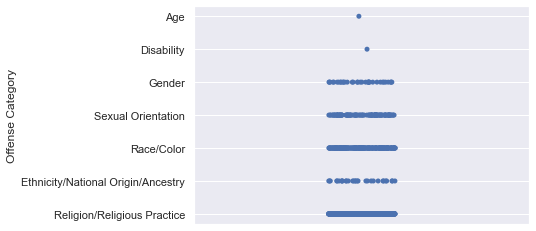

In [147]:
sns.stripplot(y=dfhate['Offense Category'])

In [37]:
dfhate[['Arrest Date']].describe()

,Arrest Date
count,266
unique,171
top,01/05/2021
freq,10


In [106]:
pd.unique(dfhate['Arrest Date'])

array([nan, '06/08/2019', '03/10/2020', '03/21/2021', '03/31/2021',
       '02/25/2021', '03/29/2020', '05/28/2019', '03/22/2021',
       '07/19/2019', '01/14/2020', '02/11/2019', '01/11/2021',
       '04/14/2021', '08/23/2019', '07/15/2019', '05/24/2020',
       '03/26/2021', '09/27/2020', '10/24/2020', '03/17/2019',
       '12/26/2020', '05/10/2019', '02/22/2021', '06/12/2020',
       '06/07/2019', '12/28/2020', '07/16/2020', '11/30/2020',
       '01/04/2021', '02/09/2021', '03/16/2020', '02/07/2021',
       '08/16/2019', '11/21/2019', '04/08/2020', '03/27/2021',
       '09/09/2019', '08/30/2020', '09/18/2019', '12/23/2019',
       '03/02/2019', '02/09/2019', '12/15/2020', '01/16/2020',
       '04/06/2019', '10/23/2019', '03/18/2021', '12/08/2020',
       '01/29/2019', '03/24/2021', '03/13/2020', '02/14/2020',
       '02/23/2021', '03/19/2021', '02/10/2020', '11/06/2019',
       '09/05/2019', '07/24/2019', '07/02/2019', '06/12/2019',
       '02/19/2020', '01/30/2020', '08/25/2020', '

In [119]:
dfhate['Arrest Date'].value_counts()

01/05/2021    10
03/24/2021     8
05/12/2020     7
08/06/2020     6
01/22/2020     4
              ..
08/09/2020     1
03/24/2020     1
09/09/2019     1
04/20/2021     1
08/29/2019     1
Name: Arrest Date, Length: 171, dtype: int64

In [58]:
dfhate[['Arrest Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Arrest Date  266 non-null    object
dtypes: object(1)
memory usage: 6.6+ KB


In [71]:
print(dfhate[['Arrest Date']])

    Arrest Date
0           NaN
1           NaN
2           NaN
3    06/08/2019
4           NaN
..          ...
827         NaN
828         NaN
829         NaN
830         NaN
831         NaN

[832 rows x 1 columns]


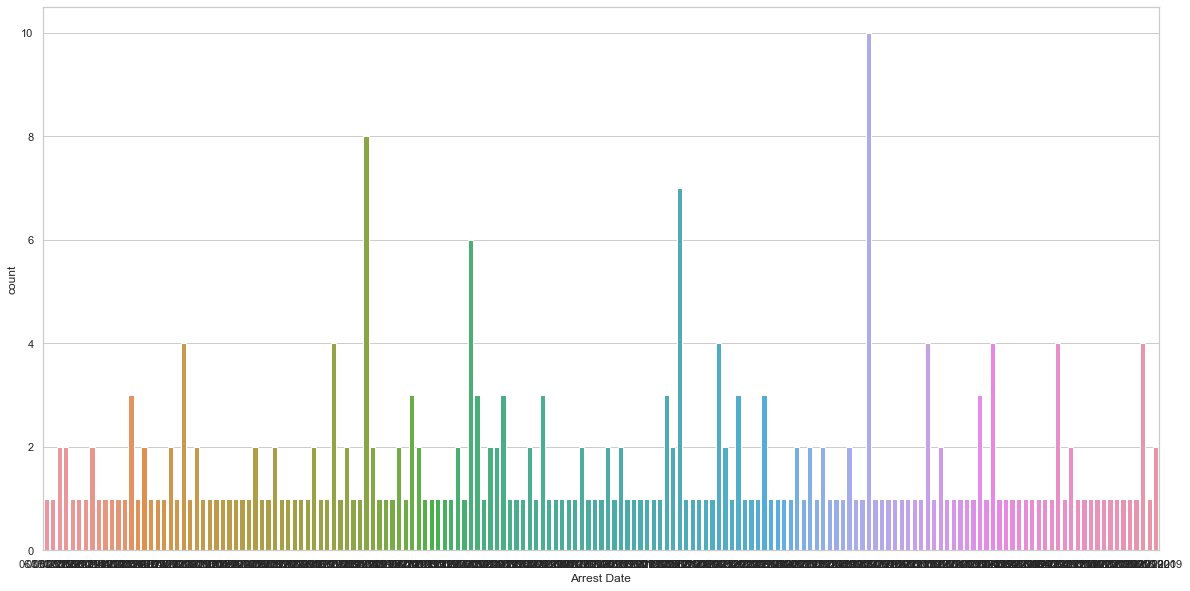

In [25]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))

ax = sns.countplot(x='Arrest Date', data=dfhate)

<h3>Pivot and Cross Tables</h3>

After investigating the variables one by one, I now use pivot and cross tables to investigate the data, focusing especially on the distribution of the hate crimes across the City.Besides, I also test other variables.

In [71]:
offence_by_region = pd.pivot_table(dfhate, index = 'County', columns = 'Offense Category')
print(offence_by_region)

                 Complaint Precinct Code             \
Offense Category                     Age Disability   
County                                                
BRONX                                NaN        NaN   
KINGS                                NaN        NaN   
NEW YORK                             NaN       19.0   
QUEENS                             115.0        NaN   
RICHMOND                             NaN        NaN   

                                                                             \
Offense Category Ethnicity/National Origin/Ancestry      Gender  Race/Color   
County                                                                        
BRONX                                     47.000000   46.333333   44.352941   
KINGS                                     74.222222   85.714286   75.060000   
NEW YORK                                  16.600000   15.000000   14.134831   
QUEENS                                   110.000000  109.000000  108.657143   
RICHMO

In [123]:
dfhate.groupby('County') ['Offense Category'].sum()

County
BRONX       Sexual OrientationRace/ColorRace/ColorSexual O...
KINGS       Religion/Religious PracticeReligion/Religious ...
NEW YORK    Religion/Religious PracticeReligion/Religious ...
QUEENS      Race/ColorSexual OrientationSexual Orientation...
RICHMOND    Sexual OrientationReligion/Religious PracticeR...
Name: Offense Category, dtype: object

<AxesSubplot:xlabel='Offense Category,County'>

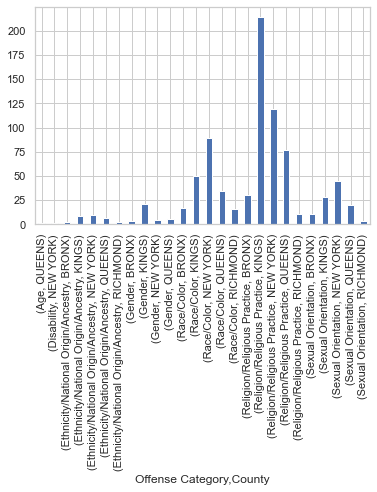

In [113]:
groups = dfhate.groupby(['Offense Category','County']).size()
groups.plot.bar()

<Figure size 36000x14400 with 0 Axes>

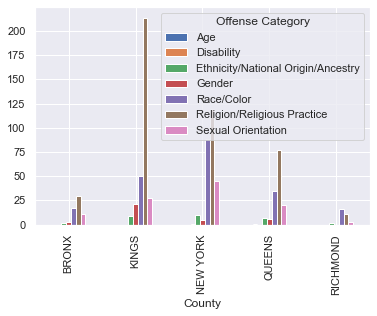

<Figure size 36000x14400 with 0 Axes>

In [125]:
pd.crosstab(dfhate['County'],dfhate['Offense Category']).plot.bar()
plt.figure(figsize=(500,200))

<AxesSubplot:xlabel='County'>

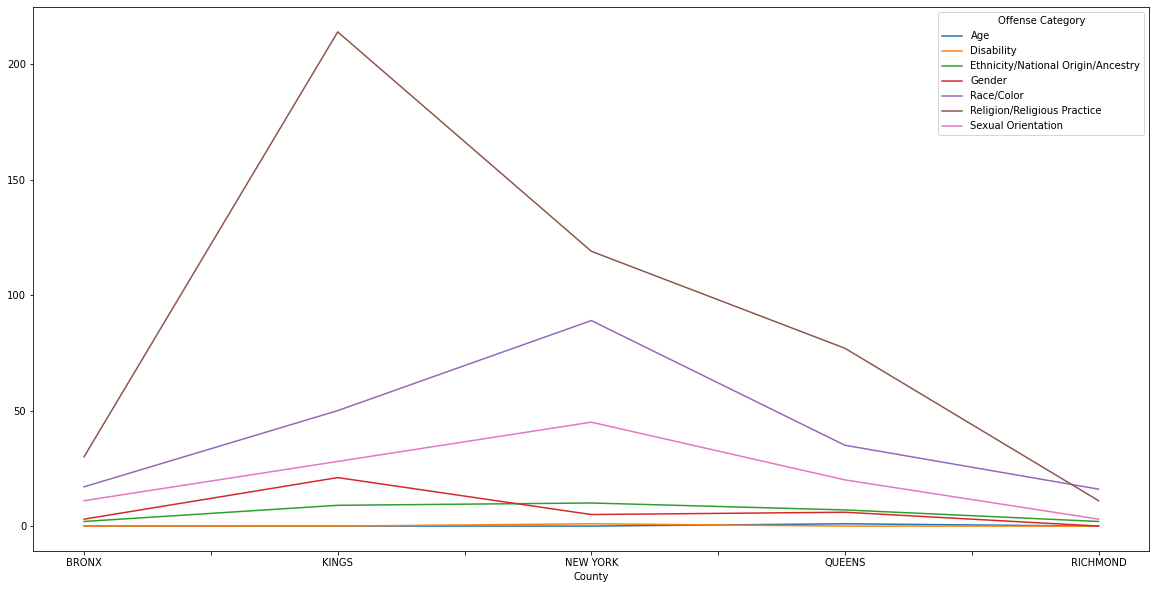

In [43]:
s1 = pd.crosstab(dfhate['County'],dfhate['Offense Category'])
s1.plot(figsize =(20,10))

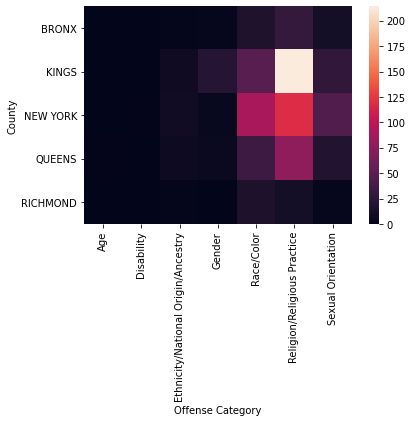

In [44]:
ax = sns.heatmap(s1)

<AxesSubplot:xlabel='County'>

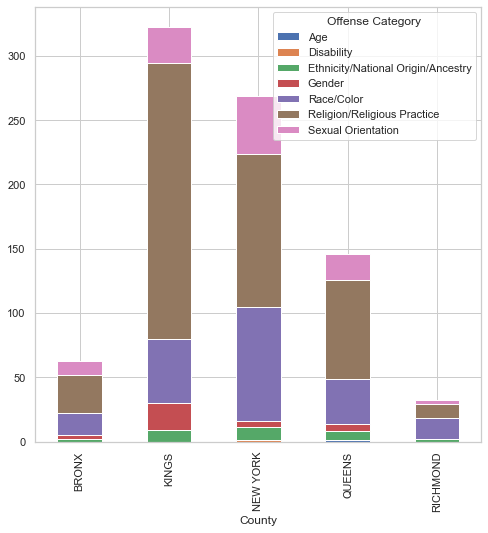

In [112]:
s1.plot(kind="bar",  figsize=(8,8),
                 stacked=True)

<AxesSubplot:xlabel='Law Code Category Description'>

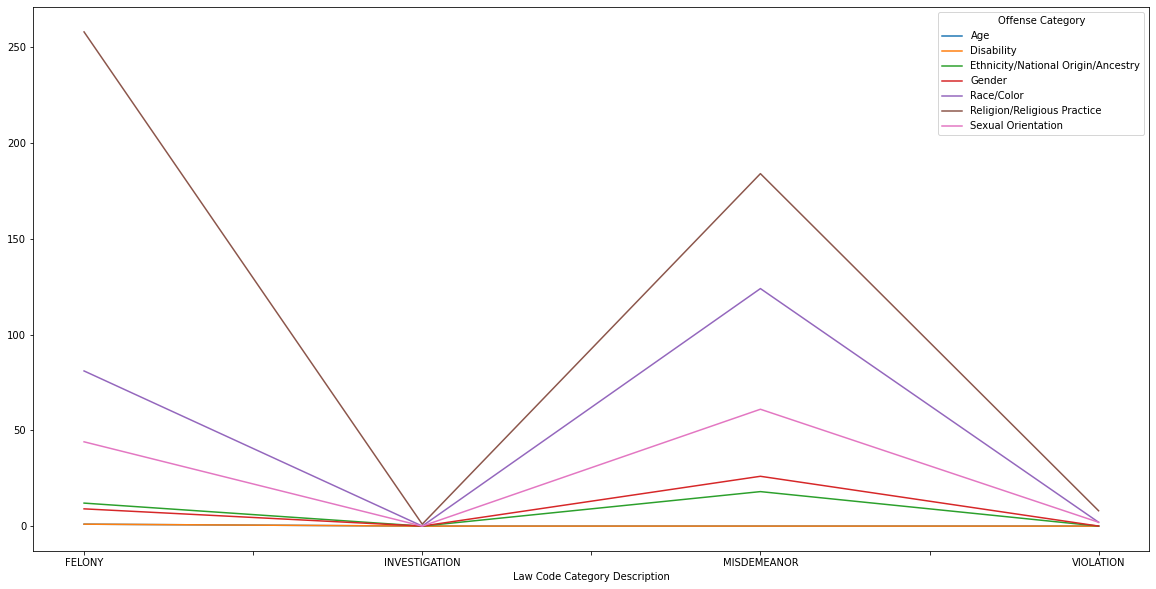

In [45]:
s1 = pd.crosstab(dfhate['Law Code Category Description'],dfhate['Offense Category'])
s1.plot(figsize =(20,10))

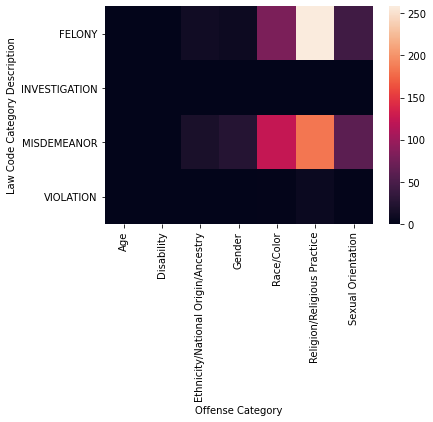

In [46]:
ax = sns.heatmap(s1)

<AxesSubplot:xlabel='Law Code Category Description'>

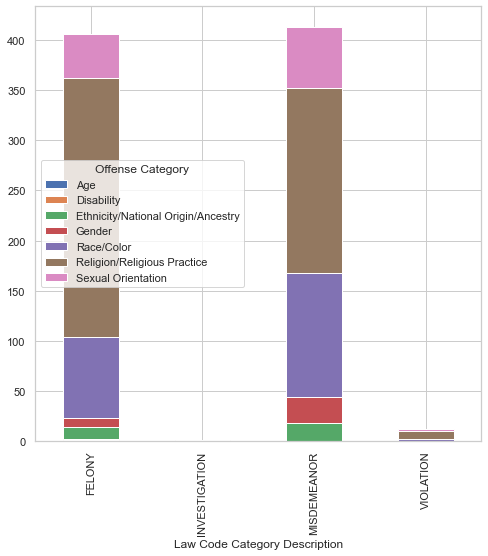

In [110]:
s1.plot(kind="bar",  figsize=(8,8),
                 stacked=True)

<AxesSubplot:xlabel='PD Code Description'>

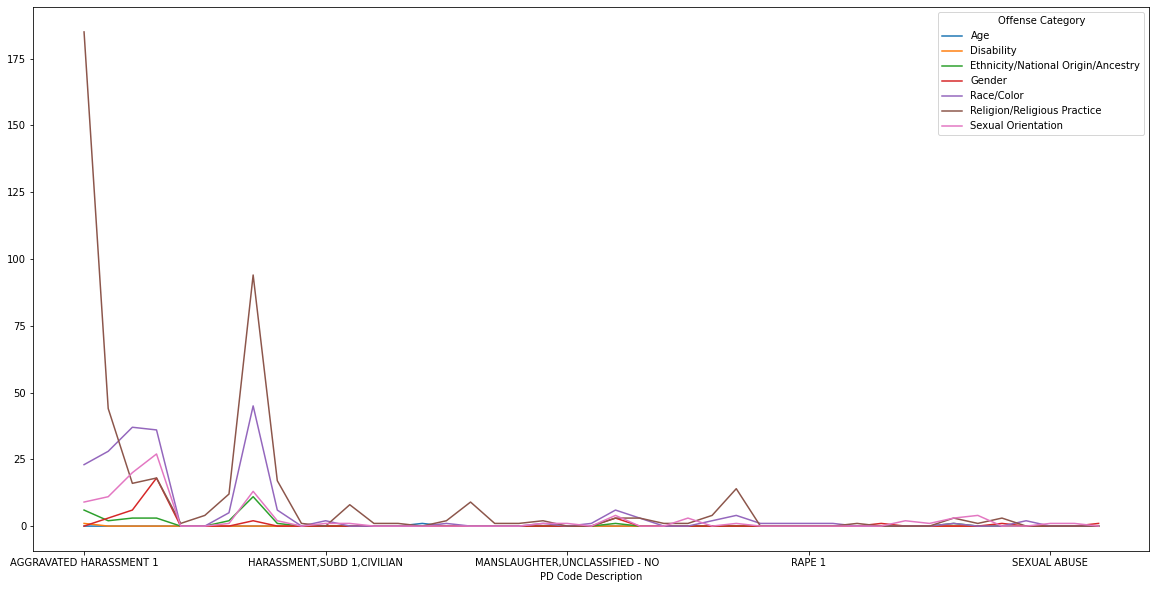

In [39]:
s1 = pd.crosstab(dfhate['PD Code Description'],dfhate['Offense Category'])
s1.plot(figsize =(20,10))

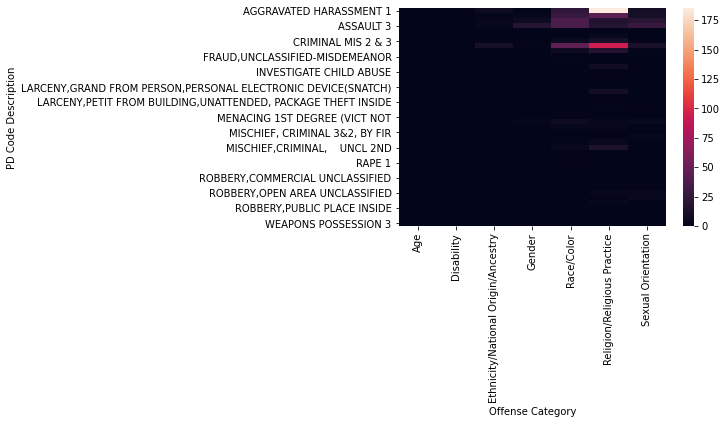

In [40]:
ax = sns.heatmap(s1)

<AxesSubplot:xlabel='PD Code Description'>

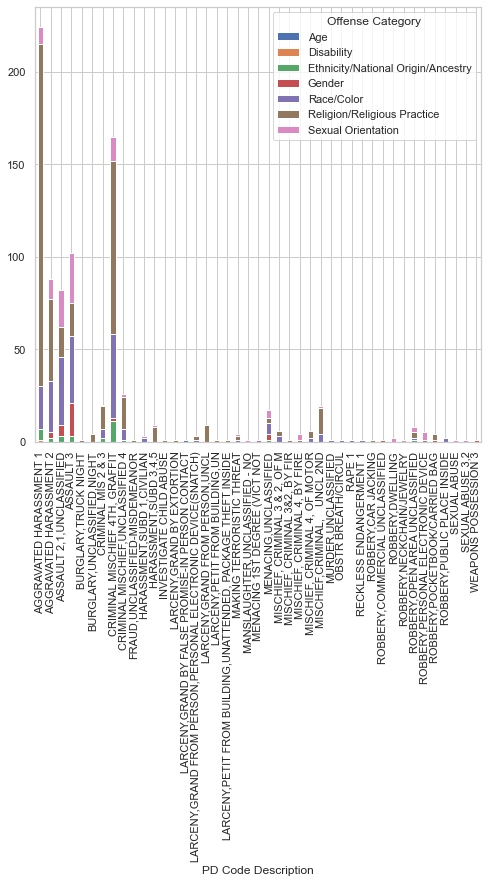

In [108]:
s1.plot(kind="bar",  figsize=(8,8),
                 stacked=True)

<AxesSubplot:xlabel='Record Create Date'>

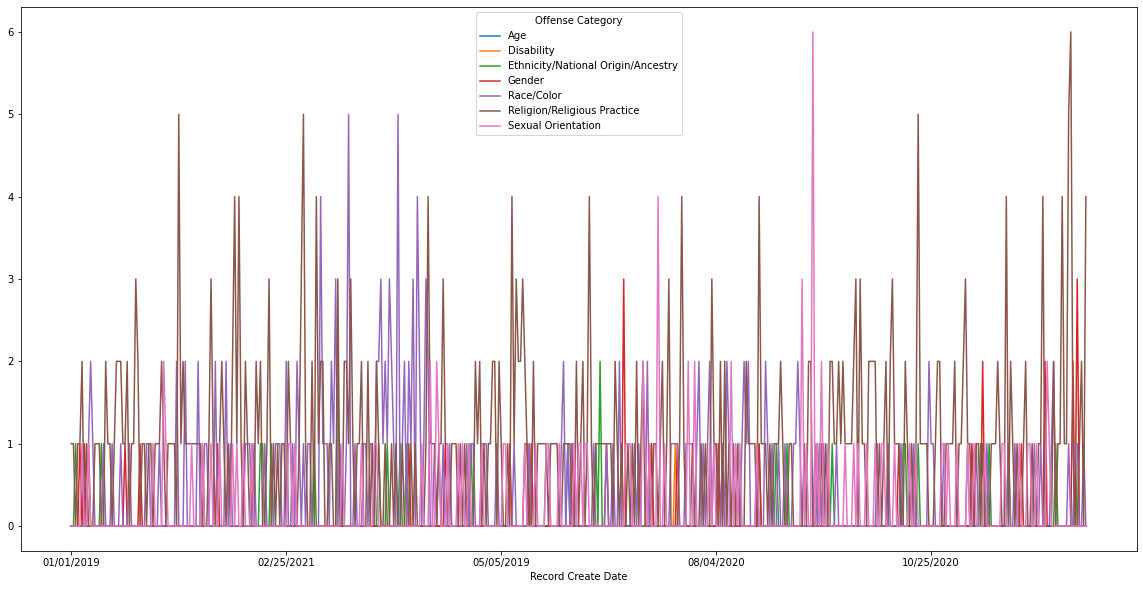

In [41]:
s1 = pd.crosstab(dfhate['Record Create Date'],dfhate['Offense Category'])
s1.plot(figsize =(20,10))

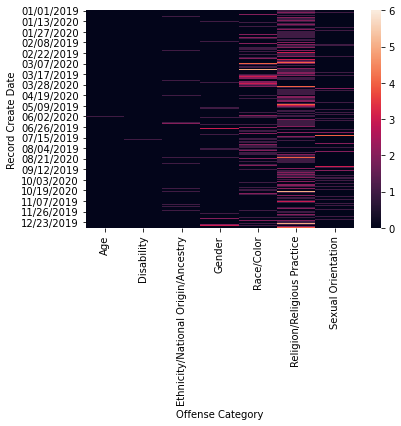

In [42]:
ax = sns.heatmap(s1)

In [66]:
crosstab = pd.crosstab(dfhate['County'], dfhate['Offense Category'])
print(crosstab)

Offense Category  Age  Disability  Ethnicity/National Origin/Ancestry  Gender  \
County                                                                          
BRONX               0           0                                   2       3   
KINGS               0           0                                   9      21   
NEW YORK            0           1                                  10       5   
QUEENS              1           0                                   7       6   
RICHMOND            0           0                                   2       0   

Offense Category  Race/Color  Religion/Religious Practice  Sexual Orientation  
County                                                                         
BRONX                     17                           30                  11  
KINGS                     50                          214                  28  
NEW YORK                  89                          119                  45  
QUEENS                    35    

<AxesSubplot:xlabel='County'>

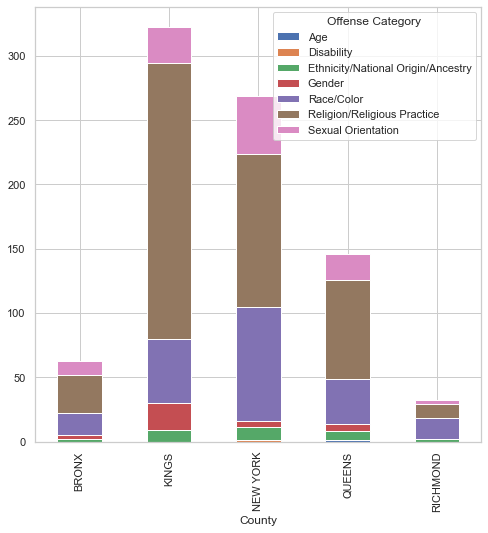

In [65]:
crosstab.plot(kind="bar",  figsize=(8,8),
                 stacked=True)

<AxesSubplot:xlabel='County', ylabel='Offense Category'>

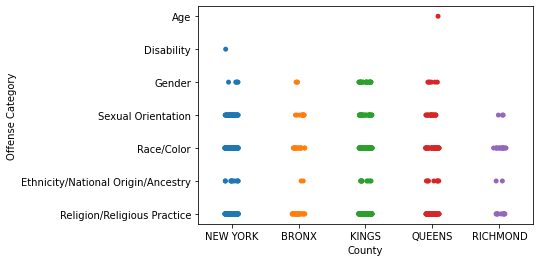

In [41]:
sns.stripplot(x="County", y="Offense Category", data=dfhate)

<h3>Correlation Analysis</h3>

After investigating the data with pivot and cross tables, I want to calculate the correlation between some nominal variables. For this, I import researchpy.

In [2]:
!pip install researchpy

In [3]:
import researchpy

In [ ]:
##Correlation between Offense Category and County.

In [134]:
researchpy.crosstab(dfhate['Offense Category'], dfhate['County'], test = 'chi-square')

(                                   County                                    
 County                              BRONX KINGS NEW YORK QUEENS RICHMOND  All
 Offense Category                                                             
 Age                                     0     0        0      1        0    1
 Disability                              0     0        1      0        0    1
 Ethnicity/National Origin/Ancestry      2     9       10      7        2   30
 Gender                                  3    21        5      6        0   35
 Race/Color                             17    50       89     35       16  207
 Religion/Religious Practice            30   214      119     77       11  451
 Sexual Orientation                     11    28       45     20        3  107
 All                                    63   322      269    146       32  832,
                  Chi-square test  results
 0  Pearson Chi-square ( 24.0) =   70.1368
 1                     p-value =    0.0000
 

In [ ]:
##There is a weak statistically significant correlation (Cramer's V = .1452) between Offense Category and County (p = .000, p < .05).

<AxesSubplot:xlabel='Offense Category', ylabel='County'>

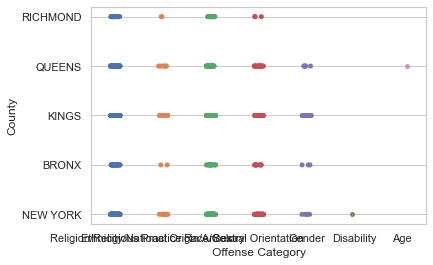

In [80]:
sns.stripplot(x="Offense Category", y="County", data=dfhate)

In [ ]:
##Correlation between Complaint Year Number and County.

In [78]:
researchpy.crosstab(dfhate['Complaint Year Number'], dfhate['County'], test = 'chi-square')

(                      County                                    
 County                 BRONX KINGS NEW YORK QUEENS RICHMOND  All
 Complaint Year Number                                           
 2019                      33   190      138     76       10  447
 2020                      26   105       86     49       18  284
 2021                       4    27       45     21        4  101
 All                       63   322      269    146       32  832,
                 Chi-square test  results
 0  Pearson Chi-square ( 8.0) =   21.9536
 1                    p-value =    0.0050
 2                 Cramer's V =    0.1149)

In [ ]:
##There is a weak statistically significant correleation (Cramer's V = .1149) between Complaint Year Number and County (p = .005, p < .05).

<AxesSubplot:xlabel='Complaint Year Number', ylabel='County'>

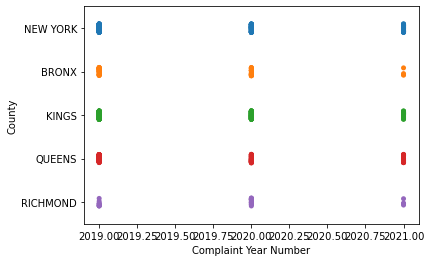

In [43]:
sns.stripplot(x="Complaint Year Number", y="County", data=dfhate)

In [ ]:
##Correlation between Patrol Borough Name and Law Code Category Description.

In [136]:
researchpy.crosstab(dfhate['Patrol Borough Name'], dfhate['Law Code Category Description'], test = 'chi-square')

(                              Law Code Category Description                \
 Law Code Category Description                        FELONY INVESTIGATION   
 Patrol Borough Name                                                         
 PATROL BORO BKLYN NORTH                                  77             0   
 PATROL BORO BKLYN SOUTH                                  97             0   
 PATROL BORO BRONX                                        35             1   
 PATROL BORO MAN NORTH                                    51             0   
 PATROL BORO MAN SOUTH                                    72             0   
 PATROL BORO QUEENS NORTH                                 42             0   
 PATROL BORO QUEENS SOUTH                                 22             0   
 PATROL BORO STATEN ISLAND                                10             0   
 All                                                     406             1   
 
                                                           
 L

In [ ]:
##There is a weak statistically significant correleation (Cramer's V = .1170) between Patrol Borough Name and Law Code Description (p = .0349, p < .05).

<AxesSubplot:xlabel='Patrol Borough Name', ylabel='Law Code Category Description'>

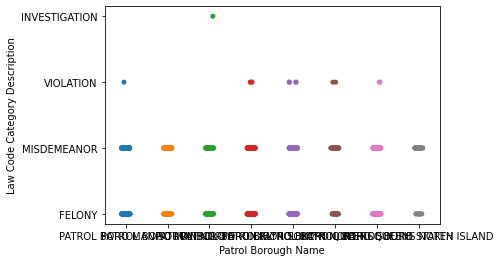

In [45]:
sns.stripplot(x="Patrol Borough Name", y="Law Code Category Description", data=dfhate)

In [ ]:
##Correlation between Offense Category and Month Number.

In [81]:
researchpy.crosstab(dfhate['Offense Category'], dfhate['Month Number'], test = 'chi-square')

(                                   Month Number                               \
 Month Number                                  1   2    3   4   5   6   7   8   
 Offense Category                                                               
 Age                                           0   0    0   0   1   0   0   0   
 Disability                                    0   0    0   0   0   0   1   0   
 Ethnicity/National Origin/Ancestry            1   3    7   1   1   3   1   2   
 Gender                                        5   2    1   1   4   5   2   3   
 Race/Color                                   15  22   73   9   5  12  16  22   
 Religion/Religious Practice                  57  49   56  21  35  28  24  32   
 Sexual Orientation                            7  10    7   8   7   7  14   6   
 All                                          85  86  144  40  53  55  58  65   
 
                                                          
 Month Number                         9  10  11 

In [ ]:
##There is a weak statistically significant correleation (Cramer's V = .1781) between Offense Category and Month Number (p = .000, p < .05).

<AxesSubplot:xlabel='Month Number', ylabel='Offense Category'>

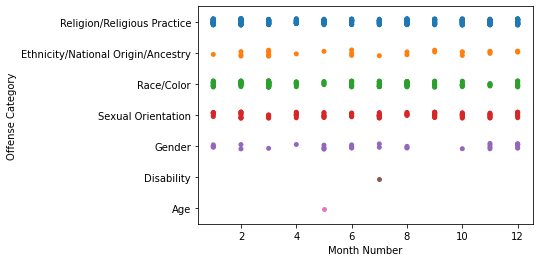

In [49]:
sns.stripplot(x="Month Number", y="Offense Category", data=dfhate)

In [ ]:
##Correlation between Offense Category and Record Create Date.

In [7]:
researchpy.crosstab(dfhate['Offense Category'], dfhate['Record Create Date'], test = 'chi-square')

(                                   Record Create Date                        \
 Record Create Date                         01/01/2019 01/01/2020 01/02/2019   
 Offense Category                                                              
 Age                                                 0          0          0   
 Disability                                          0          0          0   
 Ethnicity/National Origin/Ancestry                  0          0          1   
 Gender                                              0          0          0   
 Race/Color                                          0          0          0   
 Religion/Religious Practice                         1          1          0   
 Sexual Orientation                                  0          0          0   
 All                                                 1          1          1   
 
                                                                      \
 Record Create Date                 01/02/2020

In [ ]:
##There is a strong statistically significant correleation (Cramer's V = .7756) between Offense Category and Record Create Date (p = .0126, p < .05).

<AxesSubplot:xlabel='Offense Category', ylabel='Record Create Date'>

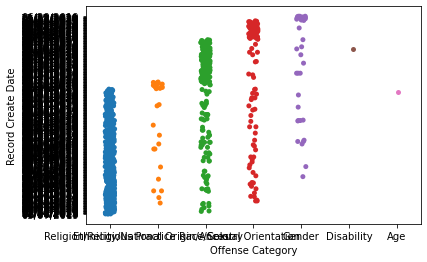

In [9]:
sns.stripplot(x="Offense Category", y="Record Create Date", data=dfhate)

In [ ]:
##Correlation between Law Code Category Descritpion and Bias Motive Description.

In [12]:
researchpy.crosstab(dfhate['Law Code Category Description'], dfhate['Bias Motive Description'], test = 'chi-square')

(                              Bias Motive Description                       \
 Bias Motive Description              60 YRS AND OLDER ANTI-ARAB ANTI-ASIAN   
 Law Code Category Description                                                
 FELONY                                              1         3         39   
 INVESTIGATION                                       0         0          0   
 MISDEMEANOR                                         0         3         41   
 VIOLATION                                           0         0          1   
 All                                                 1         6         81   
 
                                                                       \
 Bias Motive Description       ANTI-BLACK ANTI-BUDDHIST ANTI-CATHOLIC   
 Law Code Category Description                                          
 FELONY                                28             2             8   
 INVESTIGATION                          0             0             0   
 

In [ ]:
##There is no statistically significant correlation between Law Code Category Description and  Bias Motive Description (p = .418, p > .05).

<AxesSubplot:xlabel='Law Code Category Description', ylabel='Bias Motive Description'>

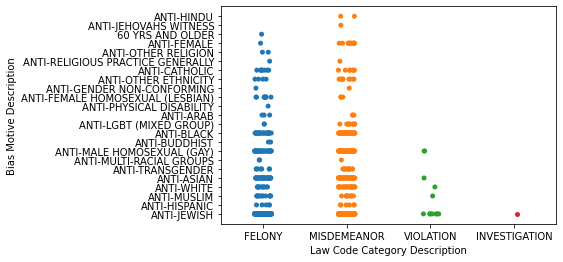

In [61]:
sns.stripplot(x="Law Code Category Description", y="Bias Motive Description", data=dfhate)